In [71]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score ,KFold
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor


In [9]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet


In [14]:
from sklearn.ensemble import BaggingClassifier

In [172]:
import warnings
warnings.filterwarnings('ignore')

In [230]:
import os
os.chdir(r'C:\Users\dbda-lab\Desktop\pml\11 Practical Machine Learning\Datasets')
import pandas as pd

# Bagging

In [5]:
bank =  pd.read_csv("Bankruptcy.csv")
bank.tail()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14
131,132,1,78,0.26,0.07,0.12,0.17,0.00,0.01,0.01,...,0.05,0.04,0.07,0.10,5.44,1.84,1.40,0.05,0.08,0.12


In [7]:
x=bank.drop(['NO','D','YR'], axis=1)
y=bank['D']
X,y

(       R1    R2    R3    R4    R5    R6    R7     R8    R9   R10  ...   R15  \
 0    0.23  0.08  0.02  0.03  0.46  0.12  0.19  10.36  1.17  0.40  ...  0.05   
 1    0.19  0.07  0.09  0.12  0.02  0.02  0.03   3.13  1.73  0.60  ...  0.09   
 2    0.07  0.02  0.03  0.05  0.06  0.10  0.14   2.41  1.36  0.41  ... -0.03   
 3    0.07  0.03  0.04  0.04  0.04  0.06  0.06   5.55  1.13  0.44  ... -0.02   
 4    0.09  0.02  0.03  0.04  0.06  0.08  0.11   2.85  1.88  0.42  ...  0.02   
 ..    ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  ...   ...   
 127  0.27  0.03  0.07  0.10  0.09  0.18  0.26   7.58  2.24  0.28  ...  0.11   
 128  0.32  0.03  0.03  0.09  0.05  0.06  0.16   3.24  5.44  0.46  ...  0.17   
 129  0.08  0.01  0.02  0.05  0.04  0.07  0.15   3.82  2.41  0.37  ...  0.19   
 130  0.14  0.01  0.05  0.07  0.02  0.09  0.14   8.18  1.57  0.11  ...  0.07   
 131  0.26  0.07  0.12  0.17  0.00  0.01  0.01   6.13  1.57  0.39  ...  0.05   
 
       R16   R17   R18     R19   R20  

In [28]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=2023,test_size=0.3,stratify=y)


In [56]:
lr=LogisticRegression()
bagging=BaggingClassifier(estimator=lr,n_estimators=15,random_state=2023)
bagging.fit(X_train,y_train)
y_pred=bagging.predict(X_test)
print("ACCURACY SCORE :",accuracy_score(y_test,y_pred))

y_pred_proba=bagging.predict_proba(X_test)[:,1]
print("roc_auc_score",roc_auc_score(y_test,y_pred))


ACCURACY SCORE : 0.825
roc_auc_score 0.825


In [30]:
## USING GAUSSIAN
gb=GaussianNB()
bagging=BaggingClassifier(estimator=gb,n_estimators=15,random_state=2023)
bagging.fit(X_train,y_train)
y_pred=bagging.predict(X_test)
print("ACCURACY SCORE :",accuracy_score(y_test,y_pred))

y_pred_proba=bagging.predict_proba(X_test)[:,1]
print("roc_auc_score",roc_auc_score(y_test,y_pred))


ACCURACY SCORE : 0.825
roc_auc_score 0.8250000000000001


In [31]:
# using LDA
lda=LinearDiscriminantAnalysis()
bagging=BaggingClassifier(estimator=lda,n_estimators=15,random_state=2023)
bagging.fit(X_train,y_train)
y_pred=bagging.predict(X_test)
print("ACCURACY SCORE :",accuracy_score(y_test,y_pred))

y_pred_proba=bagging.predict_proba(X_test)[:,1]
print("roc_auc_score",roc_auc_score(y_test,y_pred))


ACCURACY SCORE : 0.8
roc_auc_score 0.8


## USING KFOLD AND GRIDSEARCH

In [55]:
from sklearn.model_selection import StratifiedKFold, cross_val_score ,KFold


KFold=StratifiedKFold(n_splits=5,shuffle=True,random_state=2023)
bagging=BaggingClassifier(random_state=2023,n_estimators=15)
print(bagging.get_params())
lr=LogisticRegression()
gb=GaussianNB()
lda=LinearDiscriminantAnalysis()
params={'estimator':[lr,gb,lda]}
gcv=GridSearchCV(bagging, param_grid=params ,cv=KFold, scoring='roc_auc')
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)
print(gcv.best_estimator_)

{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 2023, 'verbose': 0, 'warm_start': False}
{'estimator': GaussianNB()}
0.8731191885038039
BaggingClassifier(estimator=GaussianNB(), n_estimators=15, random_state=2023)


In [60]:
KFold=StratifiedKFold(n_splits=5,shuffle=True,random_state=2023)
bagging=BaggingClassifier(random_state=2023,n_estimators=15)   #n_estimators
print(bagging.get_params())
lr=LogisticRegression()
gb=GaussianNB()
lda=LinearDiscriminantAnalysis()
svm_l=SVC(probability=True,random_state=2023,kernel='Linear')
svm_r=SVC(probability=True,random_state=2023,kernel='rbf')
params={'estimator':[lr,gb,lda,svm_l,svm_r]}
gcv=GridSearchCV(bagging, param_grid=params ,cv=KFold, scoring='roc_auc')
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)
print(gcv.best_estimator_)
# print(pd.DataFrame(gcv.best_params_))

# {'estimator': GaussianNB()}
# 0.8731191885038039
# BaggingClassifier(estimator=GaussianNB(), n_estimators=15, random_state=2023)

{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 2023, 'verbose': 0, 'warm_start': False}
{'estimator': GaussianNB()}
0.8731191885038039
BaggingClassifier(estimator=GaussianNB(), n_estimators=15, random_state=2023)


## Vehicle

In [61]:
car = pd.read_csv("Vehicle.csv")
car.head()


,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [62]:
X = car.drop('Class', axis=1)
y = car['Class']
X

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


In [63]:
label=LabelEncoder()
le_y=label.fit_transform(y)
le_y

array([3, 3, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 0, 3, 0, 1, 3, 0, 2, 1, 0, 3,
       0, 0, 2, 3, 2, 2, 0, 2, 3, 2, 1, 1, 1, 3, 0, 3, 2, 0, 1, 3, 3, 2,
       2, 3, 3, 0, 3, 2, 2, 2, 1, 0, 0, 3, 2, 3, 1, 3, 1, 1, 3, 0, 0, 1,
       0, 1, 3, 0, 1, 1, 1, 1, 3, 1, 2, 2, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3,
       0, 1, 2, 1, 2, 3, 0, 1, 2, 0, 1, 0, 0, 3, 3, 3, 0, 2, 1, 1, 0, 0,
       3, 3, 1, 1, 3, 3, 1, 2, 0, 0, 2, 3, 3, 2, 3, 3, 0, 0, 3, 0, 2, 2,
       2, 3, 1, 3, 3, 3, 2, 3, 2, 0, 1, 0, 1, 1, 3, 0, 2, 3, 2, 0, 1, 2,
       3, 0, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 3, 1, 0, 3, 0, 3, 0,
       1, 0, 0, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 3, 2, 0, 2, 0, 2, 0,
       0, 0, 3, 2, 1, 1, 3, 3, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 2, 1, 0, 3,
       1, 3, 0, 0, 2, 3, 2, 3, 2, 2, 3, 2, 0, 2, 3, 3, 0, 0, 1, 0, 1, 1,
       0, 2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 0, 3, 2, 2, 1, 2, 1, 2, 2, 3, 3,
       2, 0, 0, 2, 3, 3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 3, 2,
       0, 3, 1, 2, 3, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2,

In [78]:
%%time
KFold=StratifiedKFold(n_splits=5,shuffle=True,random_state=2023)
bagging=BaggingClassifier(random_state=2023,n_estimators=15)   #n_estimators : No of Y
print(bagging.get_params())
lr=LogisticRegression()
gb=GaussianNB()
lda=LinearDiscriminantAnalysis()
qda= QuadraticDiscriminantAnalysis()
dtc=DecisionTreeClassifier(random_state=2023)
svm_l=SVC(probability=True,random_state=2023,kernel='Linear')
svm_r=SVC(probability=True,random_state=2023,kernel='rbf')
params={'estimator':[lr,gb,lda,svm_l,svm_r,qda,dtc]}
gcv=GridSearchCV(bagging, param_grid=params ,cv=KFold, scoring='neg_log_loss',n_jobs=-1)
gcv.fit(X,le_y)

print("BEST_ESTIMATOR",gcv.best_params_)
print('bEST_SCORE',gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 2023, 'verbose': 0, 'warm_start': False}
BEST_ESTIMATOR {'estimator': QuadraticDiscriminantAnalysis()}
bEST_SCORE -0.44814086600695857
Wall time: 3.53 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.490926,0.007050,0.004997,3.814697e-07,LogisticRegression(),{'estimator': LogisticRegression()},-0.690236,-0.553366,-0.635512,-0.711492,-0.669864,-0.652094,0.055355,3
1,0.034981,0.001095,0.008195,3.996381e-04,GaussianNB(),{'estimator': GaussianNB()},-2.372509,-1.784424,-2.184606,-2.030152,-2.344263,-2.143191,0.217358,6
2,0.051970,0.002280,0.004798,3.996849e-04,LinearDiscriminantAnalysis(),{'estimator': LinearDiscriminantAnalysis()},-0.490203,-0.501562,-0.393563,-0.470680,-0.500098,-0.471221,0.040363,2
3,0.004398,0.000489,0.000000,0.000000e+00,"SVC(kernel='Linear', probability=True, random_...","{'estimator': SVC(kernel='Linear', probability...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,1.268492,0.037902,0.151519,1.209970e-02,"SVC(probability=True, random_state=2023)","{'estimator': SVC(probability=True, random_sta...",-1.109868,-1.028850,-1.028845,-1.017240,-1.105119,-1.057984,0.040673,5
5,0.040974,0.003166,0.008195,7.482774e-04,QuadraticDiscriminantAnalysis(),{'estimator': QuadraticDiscriminantAnalysis()},-0.459162,-0.398390,-0.726755,-0.298497,-0.357901,-0.448141,0.148835,1
6,0.094749,0.002706,0.004198,3.994943e-04,DecisionTreeClassifier(random_state=2023),{'estimator': DecisionTreeClassifier(random_st...,-1.594240,-0.667124,-0.635639,-0.720038,-0.559171,-0.835243,0.383059,4


# ---------------------------------------------------------------------------------------------------------------

# **                                           RANDOM FOREST **

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
bank =  pd.read_csv("Bankruptcy.csv")
bank.tail()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14
131,132,1,78,0.26,0.07,0.12,0.17,0.00,0.01,0.01,...,0.05,0.04,0.07,0.10,5.44,1.84,1.40,0.05,0.08,0.12


In [88]:
x=bank.drop(['NO','D','YR'], axis=1)
y=bank['D']
x,y

(       R1    R2    R3    R4    R5    R6    R7     R8    R9   R10  ...   R15  \
 0    0.23  0.08  0.02  0.03  0.46  0.12  0.19  10.36  1.17  0.40  ...  0.05   
 1    0.19  0.07  0.09  0.12  0.02  0.02  0.03   3.13  1.73  0.60  ...  0.09   
 2    0.07  0.02  0.03  0.05  0.06  0.10  0.14   2.41  1.36  0.41  ... -0.03   
 3    0.07  0.03  0.04  0.04  0.04  0.06  0.06   5.55  1.13  0.44  ... -0.02   
 4    0.09  0.02  0.03  0.04  0.06  0.08  0.11   2.85  1.88  0.42  ...  0.02   
 ..    ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  ...   ...   
 127  0.27  0.03  0.07  0.10  0.09  0.18  0.26   7.58  2.24  0.28  ...  0.11   
 128  0.32  0.03  0.03  0.09  0.05  0.06  0.16   3.24  5.44  0.46  ...  0.17   
 129  0.08  0.01  0.02  0.05  0.04  0.07  0.15   3.82  2.41  0.37  ...  0.19   
 130  0.14  0.01  0.05  0.07  0.02  0.09  0.14   8.18  1.57  0.11  ...  0.07   
 131  0.26  0.07  0.12  0.17  0.00  0.01  0.01   6.13  1.57  0.39  ...  0.05   
 
       R16   R17   R18     R19   R20  

In [93]:
from sklearn.model_selection import StratifiedKFold, cross_val_score ,KFold

# kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=2023)
# rf=RandomForestClassifier(random_state=2023)
# print(rf.get_params())

# params={'max_features':[3,4,5,6,7], 
#         'n_estimators':[25,50,75]} # max_feature :No of samples for tree
# gcv=GridSearchCV(rf,param_grid=params,cv=kfold ,scoring='roc_auc')

# gcv.fit(x,y)

# print(gcv.best_params_)
# print(gcv.score)
# # pd.DataFrame(gcv.best_score_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2023, 'verbose': 0, 'warm_start': False}
{'max_features': 5, 'n_estimators': 50}
<bound method BaseSearchCV.score of GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=RandomForestClassifier(random_state=2023),
             param_grid={'max_features': [3, 4, 5, 6, 7],
                         'n_estimators': [25, 50, 75]},
             scoring='roc_auc')>


In [96]:
kfold = StratifiedKFold(n_splits=5 , shuffle=True , random_state=2023)
rf = RandomForestClassifier(random_state= 2023)
params = {'max_features':[3,4,5,6,7],
         'n_estimators':[25,50,75]}
gcv = GridSearchCV(rf, param_grid=params, cv = kfold, scoring='roc_auc')
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)


{'max_features': 5, 'n_estimators': 50}
0.894378698224852


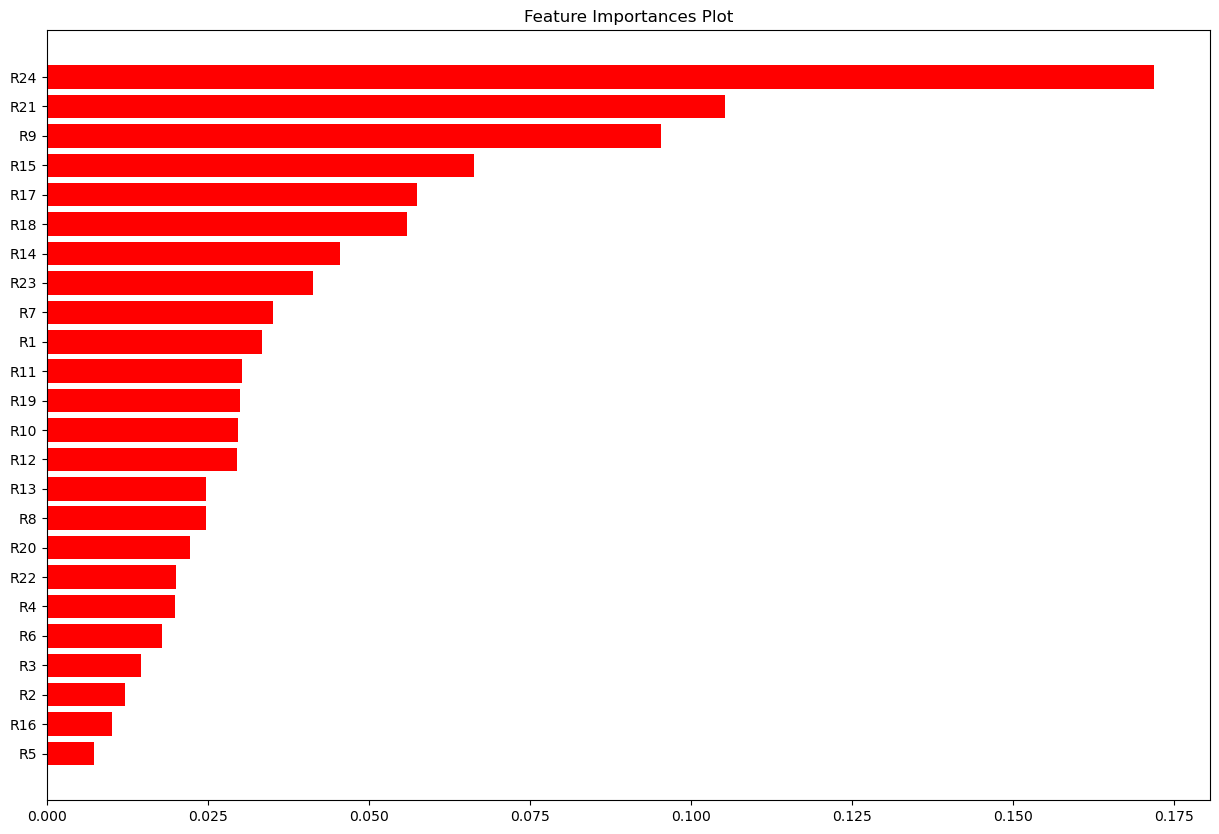

In [107]:
# To find Best features: (Feature=Column)
best_model = gcv.best_estimator_
s_index=np.argsort(imps)
imps =best_model.feature_importances_
cols=x.columns
sorted_imps =imps[s_index]
sorted_x=cols[s_index]
plt.figure(figsize=(15,10))
plt.barh(sorted_x,sorted_imps,color='r')
plt.title("Feature Importances Plot")
plt.show()


## IBM DATASET

In [115]:
ibm = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
ibm

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [116]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [121]:
dum_ibm =pd.get_dummies(ibm,drop_first=True)
x = dum_ibm.drop(['Attrition_Yes','EmployeeNumber'],axis =1)
y = dum_ibm['Attrition_Yes']


In [124]:
kfold = StratifiedKFold(n_splits=5 , shuffle=True , random_state=2023)
rf = RandomForestClassifier(random_state= 2023)
params = {'max_features':[3,4,5,6,7,15],
         'n_estimators':[25,50,75]}
gcv = GridSearchCV(rf, param_grid=params, cv = kfold, scoring='roc_auc')
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_features': 15, 'n_estimators': 75}
0.8044684071103138


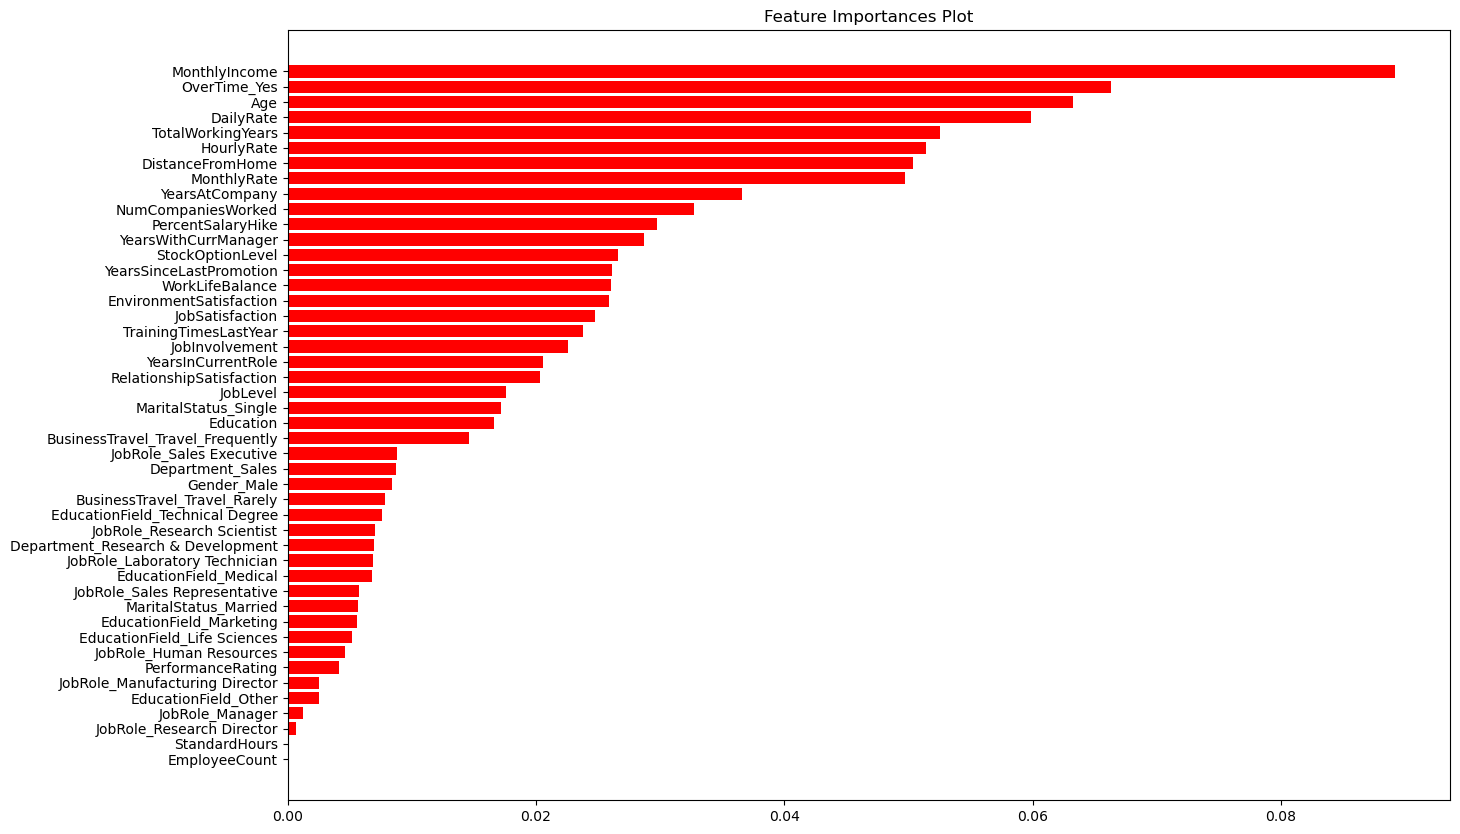

In [130]:
# To find Best features: (Feature=Column)
best_model = gcv.best_estimator_
imps =best_model.feature_importances_
s_index=np.argsort(imps)
cols=x.columns
sorted_imps =imps[s_index]
sorted_x=cols[s_index]
plt.figure(figsize=(15,10))
plt.barh(sorted_x,sorted_imps,color='r')
plt.title("Feature Importances Plot")
plt.show()

# Gradient Boosting & HistGradientBoostingClassifier

### What is Bias and Variance
- Bias is actually error rate of traning data (low Error rate =>Good).
- variance is the difference between the error rate of tranining data and tesing data. (low variance =>good)

### HistGradientBoosting:
- Histogram-based Gradient Boosting Classification Tree.
- This estimator is much faster than GradientBoostingClassifier for big datasets (n_samples >= 10 000).
- In HistGradientBoosting we cannot use **n_estimators** instead we use **max_iter** to interate or to  select the number of trees.
### max_iter 
- The maximum number of iterations of the boosting process, i.e. the maximum number of trees for binary classification

In [152]:
from sklearn.ensemble import GradientBoostingClassifier,HistGradientBoostingClassifier

In [132]:
bank =  pd.read_csv("Bankruptcy.csv")
bank.tail()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14
131,132,1,78,0.26,0.07,0.12,0.17,0.00,0.01,0.01,...,0.05,0.04,0.07,0.10,5.44,1.84,1.40,0.05,0.08,0.12


In [133]:
x=bank.drop(['NO','D','YR'], axis=1)
y=bank['D']
x,y

(       R1    R2    R3    R4    R5    R6    R7     R8    R9   R10  ...   R15  \
 0    0.23  0.08  0.02  0.03  0.46  0.12  0.19  10.36  1.17  0.40  ...  0.05   
 1    0.19  0.07  0.09  0.12  0.02  0.02  0.03   3.13  1.73  0.60  ...  0.09   
 2    0.07  0.02  0.03  0.05  0.06  0.10  0.14   2.41  1.36  0.41  ... -0.03   
 3    0.07  0.03  0.04  0.04  0.04  0.06  0.06   5.55  1.13  0.44  ... -0.02   
 4    0.09  0.02  0.03  0.04  0.06  0.08  0.11   2.85  1.88  0.42  ...  0.02   
 ..    ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  ...   ...   
 127  0.27  0.03  0.07  0.10  0.09  0.18  0.26   7.58  2.24  0.28  ...  0.11   
 128  0.32  0.03  0.03  0.09  0.05  0.06  0.16   3.24  5.44  0.46  ...  0.17   
 129  0.08  0.01  0.02  0.05  0.04  0.07  0.15   3.82  2.41  0.37  ...  0.19   
 130  0.14  0.01  0.05  0.07  0.02  0.09  0.14   8.18  1.57  0.11  ...  0.07   
 131  0.26  0.07  0.12  0.17  0.00  0.01  0.01   6.13  1.57  0.39  ...  0.05   
 
       R16   R17   R18     R19   R20  

In [140]:
gc = GradientBoostingClassifier(random_state=2023)
params = {'learning_rate': [0.1,0.2,0.3,0.4,0.5],'n_estimators':[20,50,75], 'max_depth':[2,3,4,5]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
gcv = GridSearchCV(gc, param_grid=params, cv = kfold, scoring='roc_auc',n_jobs=-1)
gcv.fit(x,y)
print('BEST_PARAMETER',gcv.best_params_)
print('BEST_SCORE',gcv.best_score_)

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 20}
0.8980135249366018


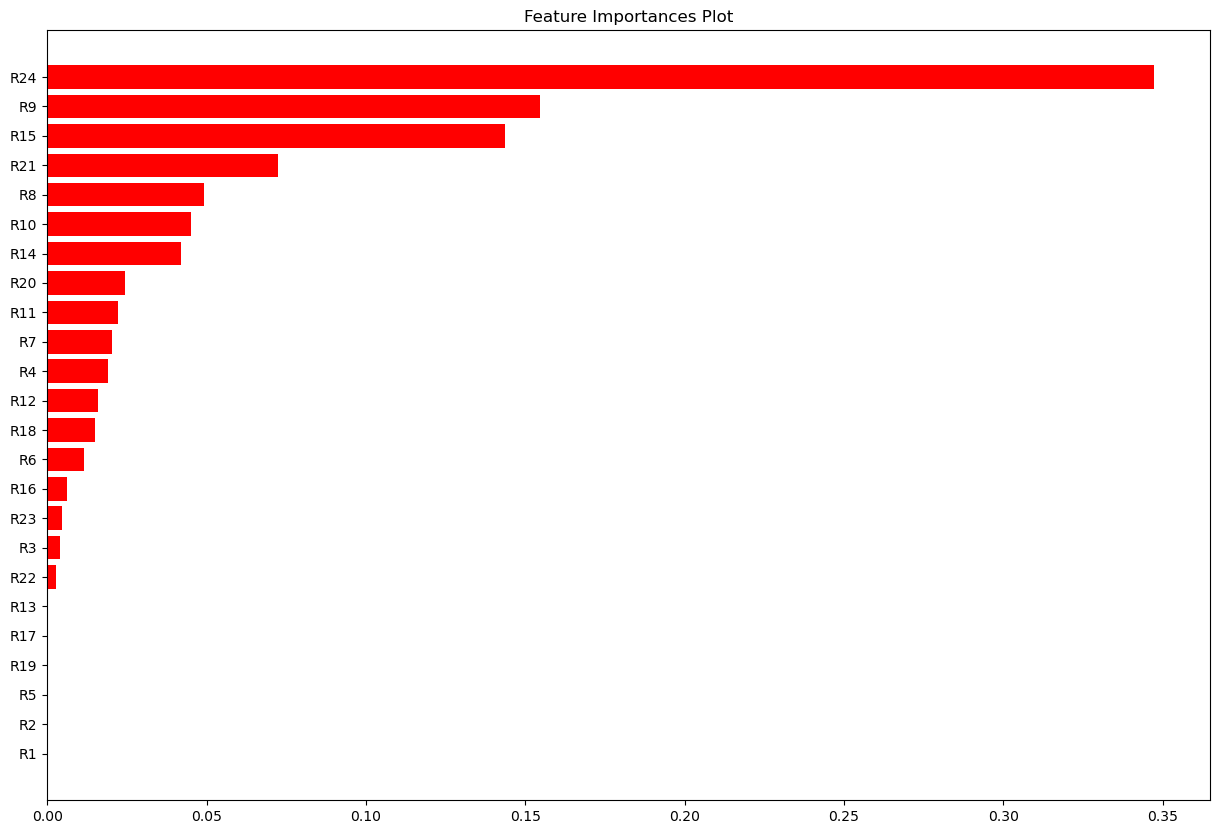

In [141]:
# To find Best features:(Feature=Column)BETS FEATURE MEANS IT IS MORE FLACTUTING TOWARDS THE Y VARIBLE
best_model = gcv.best_estimator_
imps =best_model.feature_importances_
s_index=np.argsort(imps)
cols=x.columns
sorted_imps =imps[s_index]
sorted_x=cols[s_index]
plt.figure(figsize=(15,10))
plt.barh(sorted_x,sorted_imps,color='r')
plt.title("Feature Importances Plot")
plt.show()

In [156]:
# Using Hist Gradient Classifier 

gc = HistGradientBoostingClassifier(random_state=2023)
params = {'learning_rate': [0.1,0.15,0.3,0.35,0.4,0.5],'max_iter':[20,50,75], 'max_depth':[2,3,4,5]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
gcv = GridSearchCV(gc, param_grid=params, cv = kfold, scoring='roc_auc',n_jobs=-1)
gcv.fit(x,y)
print('BEST_PARAMETER',gcv.best_params_)
print('BEST_SCORE',gcv.best_score_)


BEST_PARAMETER {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 50}
BEST_SCORE 0.8115691110018602


## IBM DATASET

In [142]:
ibm = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
ibm

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [143]:
dum_ibm =pd.get_dummies(ibm,drop_first=True)
x = dum_ibm.drop(['Attrition_Yes','EmployeeNumber'],axis =1)
y = dum_ibm['Attrition_Yes']


In [146]:
gc = GradientBoostingClassifier(random_state=2023)
params = {'learning_rate': [0.1,0.15,0.3,0.35,0.4,0.5],'n_estimators':[20,50,75], 'max_depth':[2,3,4,5]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
gcv = GridSearchCV(gc, param_grid=params, cv = kfold, scoring='roc_auc',n_jobs=-1)
gcv.fit(x,y)
print('BEST_PARAMETER',gcv.best_params_)
print('BEST_SCORE',gcv.best_score_)

# n_estimators : No of Trees/No of Bootsrap


BEST_PARAMETER {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 75}
BEST_SCORE 0.8210384266388966


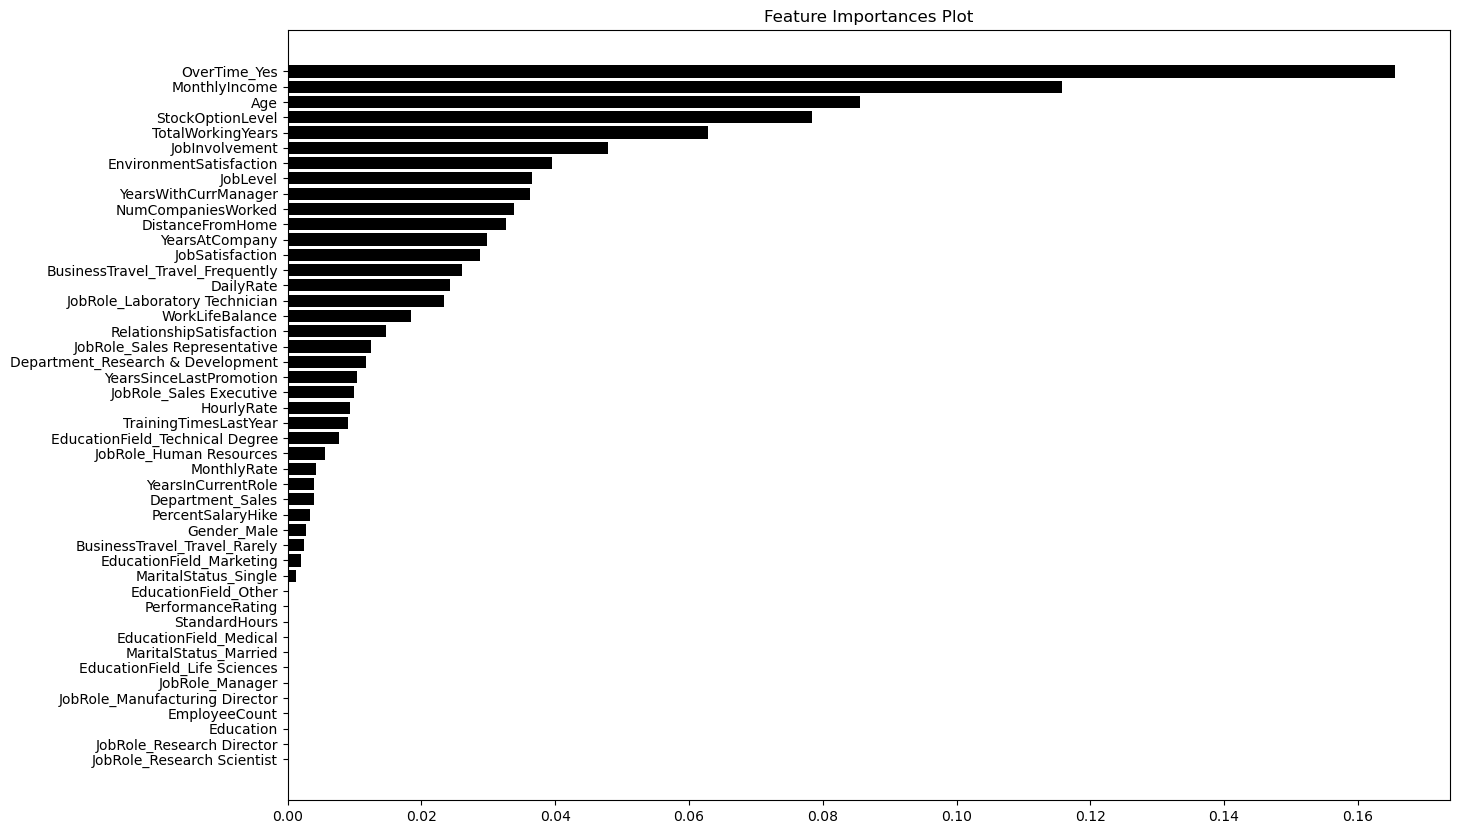

In [151]:
# To find Best features:(Feature=Column)BETS FEATURE MEANS IT IS MORE FLACTUTING TOWARDS THE Y VARIBLE
best_model = gcv.best_estimator_
imps =best_model.feature_importances_
s_index=np.argsort(imps)
cols=x.columns
sorted_imps =imps[s_index]
sorted_x=cols[s_index]
plt.figure(figsize=(15,10))
plt.barh(sorted_x,sorted_imps,color='k')
plt.title("Feature Importances Plot")
plt.show()

In [157]:
# Using Hist Gradient Classifier : Basically it same like gradient 

gc = HistGradientBoostingClassifier(random_state=2023)
params = {'learning_rate': [0.1,0.15,0.3,0.35,0.4,0.5],'max_iter':[20,50,75], 'max_depth':[2,3,4,5]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
gcv = GridSearchCV(gc, param_grid=params, cv = kfold, scoring='roc_auc',n_jobs=-1)
gcv.fit(x,y)
print('BEST_PARAMETER',gcv.best_params_)
print('BEST_SCORE',gcv.best_score_)


BEST_PARAMETER {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 50}
BEST_SCORE 0.8115691110018602


# USING XGBoost :

In [159]:
import xgboost as xgb

In [203]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [163]:
bank =  pd.read_csv("Bankruptcy.csv")
bank.tail()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14
131,132,1,78,0.26,0.07,0.12,0.17,0.00,0.01,0.01,...,0.05,0.04,0.07,0.10,5.44,1.84,1.40,0.05,0.08,0.12


In [164]:
x=bank.drop(['NO','D','YR'], axis=1)
y=bank['D']
x,y

(       R1    R2    R3    R4    R5    R6    R7     R8    R9   R10  ...   R15  \
 0    0.23  0.08  0.02  0.03  0.46  0.12  0.19  10.36  1.17  0.40  ...  0.05   
 1    0.19  0.07  0.09  0.12  0.02  0.02  0.03   3.13  1.73  0.60  ...  0.09   
 2    0.07  0.02  0.03  0.05  0.06  0.10  0.14   2.41  1.36  0.41  ... -0.03   
 3    0.07  0.03  0.04  0.04  0.04  0.06  0.06   5.55  1.13  0.44  ... -0.02   
 4    0.09  0.02  0.03  0.04  0.06  0.08  0.11   2.85  1.88  0.42  ...  0.02   
 ..    ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  ...   ...   
 127  0.27  0.03  0.07  0.10  0.09  0.18  0.26   7.58  2.24  0.28  ...  0.11   
 128  0.32  0.03  0.03  0.09  0.05  0.06  0.16   3.24  5.44  0.46  ...  0.17   
 129  0.08  0.01  0.02  0.05  0.04  0.07  0.15   3.82  2.41  0.37  ...  0.19   
 130  0.14  0.01  0.05  0.07  0.02  0.09  0.14   8.18  1.57  0.11  ...  0.07   
 131  0.26  0.07  0.12  0.17  0.00  0.01  0.01   6.13  1.57  0.39  ...  0.05   
 
       R16   R17   R18     R19   R20  

In [173]:
import warnings
warnings.filterwarnings("ignore")

xgb = XGBClassifier(random_state=2023)

params = {'learning_rate':[0.1,0.15,0.3,0.35,0.4,0.5],
          'n_estimators':[25,50,75],
          'max_depth':[2,3,4,5]}

kfold =  StratifiedKFold(n_splits=5,shuffle=True,random_state=2023)
gcv = GridSearchCV(xgb, param_grid = params,cv = kfold,scoring='roc_auc')
gcv.fit(x, y)

print(gcv.best_params_)
print(gcv.best_score_)

#{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}
# 0.8927303465765004

[17:19:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:15] WARNING:

[17:19:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:15] WARNING:

[17:19:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:16] WARNING:

[17:19:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:17] WARNING:

[17:19:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:17] WARNING:

[17:19:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:18] WARNING:

[17:19:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:19] WARNING:

[17:19:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:19] WARNING:

[17:19:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:20] WARNING:

[17:19:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:21] WARNING:

[17:19:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:21] WARNING:

[17:19:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:22] WARNING:

[17:19:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:23] WARNING:

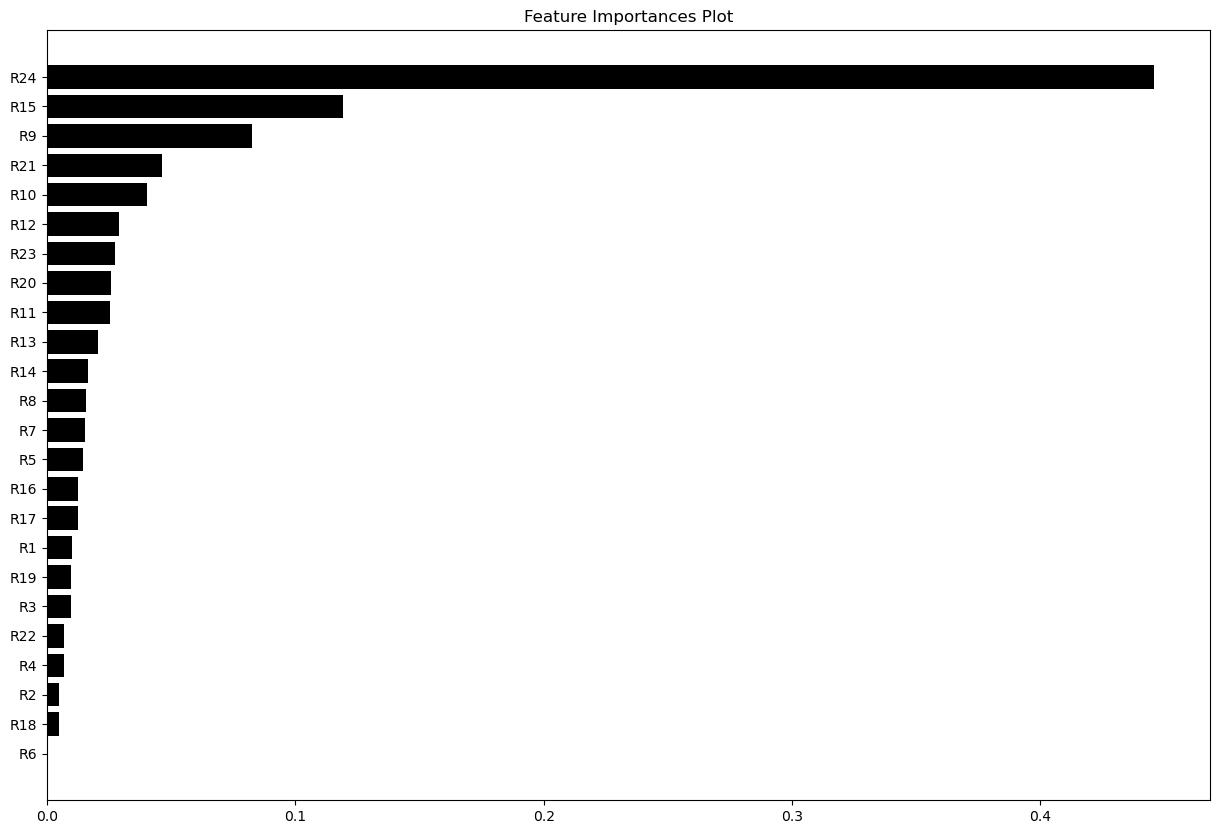

In [171]:
# To find Best features:(Feature=Column)BETS FEATURE MEANS IT IS MORE FLACTUTING TOWARDS THE Y VARIBLE
best_model = gcv.best_estimator_
imps =best_model.feature_importances_
s_index=np.argsort(imps)
cols=x.columns
sorted_imps =imps[s_index]
sorted_x=cols[s_index]
plt.figure(figsize=(15,10))
plt.barh(sorted_x,sorted_imps,color='k')
plt.title("Feature Importances Plot")
plt.show()

0:	learn: 0.6521933	total: 1.06ms	remaining: 25.5ms
1:	learn: 0.6033272	total: 2.19ms	remaining: 25.2ms
2:	learn: 0.5383501	total: 3.13ms	remaining: 23ms
3:	learn: 0.4878758	total: 5.2ms	remaining: 27.3ms
4:	learn: 0.4477009	total: 7.27ms	remaining: 29.1ms
5:	learn: 0.4136830	total: 9.35ms	remaining: 29.6ms
6:	learn: 0.3999200	total: 11.4ms	remaining: 29.4ms
7:	learn: 0.3847579	total: 13.5ms	remaining: 28.7ms
8:	learn: 0.3757263	total: 15.6ms	remaining: 27.8ms
9:	learn: 0.3647495	total: 17.7ms	remaining: 26.6ms
10:	learn: 0.3515264	total: 19.8ms	remaining: 25.2ms
11:	learn: 0.3435849	total: 21.9ms	remaining: 23.7ms
12:	learn: 0.3335037	total: 23.9ms	remaining: 22.1ms
13:	learn: 0.3232140	total: 26ms	remaining: 20.4ms
14:	learn: 0.3080931	total: 28.1ms	remaining: 18.7ms
15:	learn: 0.2996654	total: 30.8ms	remaining: 17.4ms
16:	learn: 0.2918637	total: 32ms	remaining: 15.1ms
17:	learn: 0.2855234	total: 33.1ms	remaining: 12.9ms
18:	learn: 0.2762914	total: 34.1ms	remaining: 10.8ms
19:	learn:

0:	learn: 0.6386388	total: 1.52ms	remaining: 74.4ms
1:	learn: 0.5890251	total: 3.05ms	remaining: 73.2ms
2:	learn: 0.5386873	total: 4.36ms	remaining: 68.3ms
3:	learn: 0.5006710	total: 5.61ms	remaining: 64.5ms
4:	learn: 0.4480635	total: 6.86ms	remaining: 61.7ms
5:	learn: 0.4188148	total: 8.01ms	remaining: 58.7ms
6:	learn: 0.4037944	total: 9.13ms	remaining: 56.1ms
7:	learn: 0.3852071	total: 10.1ms	remaining: 53.1ms
8:	learn: 0.3669655	total: 11.1ms	remaining: 50.6ms
9:	learn: 0.3504849	total: 12.3ms	remaining: 49.1ms
10:	learn: 0.3347583	total: 13.7ms	remaining: 48.7ms
11:	learn: 0.3253118	total: 15ms	remaining: 47.3ms
12:	learn: 0.3127225	total: 16ms	remaining: 45.4ms
13:	learn: 0.2962489	total: 16.9ms	remaining: 43.5ms
14:	learn: 0.2828307	total: 17.9ms	remaining: 41.7ms
15:	learn: 0.2761649	total: 19ms	remaining: 40.3ms
16:	learn: 0.2647632	total: 19.9ms	remaining: 38.7ms
17:	learn: 0.2577833	total: 20.9ms	remaining: 37.2ms
18:	learn: 0.2468184	total: 22ms	remaining: 35.8ms
19:	learn: 

0:	learn: 0.6521933	total: 1.08ms	remaining: 80.3ms
1:	learn: 0.6033272	total: 2.27ms	remaining: 82.9ms
2:	learn: 0.5383501	total: 3.37ms	remaining: 80.9ms
3:	learn: 0.4878758	total: 4.46ms	remaining: 79.2ms
4:	learn: 0.4477009	total: 5.53ms	remaining: 77.5ms
5:	learn: 0.4136830	total: 6.6ms	remaining: 75.9ms
6:	learn: 0.3999200	total: 7.56ms	remaining: 73.5ms
7:	learn: 0.3847579	total: 8.52ms	remaining: 71.3ms
8:	learn: 0.3757263	total: 10.3ms	remaining: 75.9ms
9:	learn: 0.3647495	total: 11.5ms	remaining: 74.6ms
10:	learn: 0.3515264	total: 12.6ms	remaining: 73.2ms
11:	learn: 0.3435849	total: 13.6ms	remaining: 71.7ms
12:	learn: 0.3335037	total: 14.6ms	remaining: 69.8ms
13:	learn: 0.3232140	total: 15.6ms	remaining: 67.9ms
14:	learn: 0.3080931	total: 16.5ms	remaining: 66.2ms
15:	learn: 0.2996654	total: 17.5ms	remaining: 64.6ms
16:	learn: 0.2918637	total: 18.5ms	remaining: 63ms
17:	learn: 0.2855234	total: 19.4ms	remaining: 61.5ms
18:	learn: 0.2762914	total: 20.3ms	remaining: 60ms
19:	lear

0:	learn: 0.6269109	total: 1.27ms	remaining: 94.2ms
1:	learn: 0.5804105	total: 2.52ms	remaining: 91.9ms
2:	learn: 0.5439862	total: 3.66ms	remaining: 87.8ms
3:	learn: 0.5123309	total: 4.68ms	remaining: 83ms
4:	learn: 0.4696308	total: 5.67ms	remaining: 79.3ms
5:	learn: 0.4442562	total: 6.68ms	remaining: 76.8ms
6:	learn: 0.4098639	total: 7.67ms	remaining: 74.5ms
7:	learn: 0.3835922	total: 8.63ms	remaining: 72.3ms
8:	learn: 0.3675904	total: 9.63ms	remaining: 70.7ms
9:	learn: 0.3500803	total: 11.1ms	remaining: 72.2ms
10:	learn: 0.3362367	total: 12.4ms	remaining: 72ms
11:	learn: 0.3269651	total: 13.6ms	remaining: 71.5ms
12:	learn: 0.3184780	total: 14.7ms	remaining: 70.1ms
13:	learn: 0.3091295	total: 15.9ms	remaining: 69.1ms
14:	learn: 0.3004650	total: 16.8ms	remaining: 67.3ms
15:	learn: 0.2940708	total: 17.8ms	remaining: 65.6ms
16:	learn: 0.2852004	total: 18.7ms	remaining: 63.9ms
17:	learn: 0.2810947	total: 19.7ms	remaining: 62.5ms
18:	learn: 0.2732326	total: 20.7ms	remaining: 61ms
19:	learn

0:	learn: 0.6237166	total: 1.7ms	remaining: 40.9ms
1:	learn: 0.5751401	total: 3.54ms	remaining: 40.7ms
2:	learn: 0.5164906	total: 5.23ms	remaining: 38.4ms
3:	learn: 0.4725270	total: 7.27ms	remaining: 38.2ms
4:	learn: 0.4282478	total: 8.88ms	remaining: 35.5ms
5:	learn: 0.3795894	total: 10.5ms	remaining: 33.2ms
6:	learn: 0.3571575	total: 12.1ms	remaining: 31ms
7:	learn: 0.3302752	total: 13.7ms	remaining: 29ms
8:	learn: 0.3113310	total: 15.2ms	remaining: 27.1ms
9:	learn: 0.2890501	total: 16.8ms	remaining: 25.2ms
10:	learn: 0.2763094	total: 18.4ms	remaining: 23.4ms
11:	learn: 0.2625147	total: 20ms	remaining: 21.6ms
12:	learn: 0.2445252	total: 21.9ms	remaining: 20.2ms
13:	learn: 0.2364973	total: 23ms	remaining: 18ms
14:	learn: 0.2277661	total: 24ms	remaining: 16ms
15:	learn: 0.2172349	total: 25.1ms	remaining: 14.1ms
16:	learn: 0.2118188	total: 26.1ms	remaining: 12.3ms
17:	learn: 0.2096502	total: 27.2ms	remaining: 10.6ms
18:	learn: 0.2044772	total: 28.2ms	remaining: 8.92ms
19:	learn: 0.19717

0:	learn: 0.6287460	total: 1.19ms	remaining: 58.4ms
1:	learn: 0.5836377	total: 2.46ms	remaining: 58.9ms
2:	learn: 0.5428068	total: 3.52ms	remaining: 55.2ms
3:	learn: 0.5173098	total: 4.59ms	remaining: 52.8ms
4:	learn: 0.4663109	total: 5.65ms	remaining: 50.9ms
5:	learn: 0.4389788	total: 6.71ms	remaining: 49.2ms
6:	learn: 0.4112807	total: 7.77ms	remaining: 47.7ms
7:	learn: 0.4007981	total: 8.8ms	remaining: 46.2ms
8:	learn: 0.3878919	total: 9.85ms	remaining: 44.9ms
9:	learn: 0.3748769	total: 11ms	remaining: 44.2ms
10:	learn: 0.3583261	total: 12.2ms	remaining: 43.2ms
11:	learn: 0.3447901	total: 13.4ms	remaining: 42.4ms
12:	learn: 0.3253100	total: 14.6ms	remaining: 41.5ms
13:	learn: 0.3141483	total: 15.8ms	remaining: 40.6ms
14:	learn: 0.3049756	total: 17ms	remaining: 39.6ms
15:	learn: 0.2991185	total: 18.3ms	remaining: 38.8ms
16:	learn: 0.2928258	total: 19.6ms	remaining: 38ms
17:	learn: 0.2878507	total: 20.9ms	remaining: 37.2ms
18:	learn: 0.2843112	total: 22.1ms	remaining: 36.1ms
19:	learn:

0:	learn: 0.6237166	total: 1.87ms	remaining: 138ms
1:	learn: 0.5751401	total: 3.58ms	remaining: 131ms
2:	learn: 0.5164906	total: 5.02ms	remaining: 120ms
3:	learn: 0.4725270	total: 6.46ms	remaining: 115ms
4:	learn: 0.4282478	total: 7.88ms	remaining: 110ms
5:	learn: 0.3795894	total: 9.33ms	remaining: 107ms
6:	learn: 0.3571575	total: 10.8ms	remaining: 105ms
7:	learn: 0.3302752	total: 12.8ms	remaining: 108ms
8:	learn: 0.3113310	total: 14.7ms	remaining: 108ms
9:	learn: 0.2890501	total: 16.6ms	remaining: 108ms
10:	learn: 0.2763094	total: 18.1ms	remaining: 105ms
11:	learn: 0.2625147	total: 19.5ms	remaining: 102ms
12:	learn: 0.2445252	total: 21ms	remaining: 100ms
13:	learn: 0.2364973	total: 22.4ms	remaining: 97.7ms
14:	learn: 0.2277661	total: 23.9ms	remaining: 95.4ms
15:	learn: 0.2172349	total: 25.3ms	remaining: 93.3ms
16:	learn: 0.2118188	total: 26.7ms	remaining: 91.2ms
17:	learn: 0.2096502	total: 29.2ms	remaining: 92.5ms
18:	learn: 0.2044772	total: 31ms	remaining: 91.4ms
19:	learn: 0.1971702

0:	learn: 0.6410069	total: 3.02ms	remaining: 224ms
1:	learn: 0.5944216	total: 4.78ms	remaining: 175ms
2:	learn: 0.5409236	total: 6.47ms	remaining: 155ms
3:	learn: 0.5168763	total: 7.95ms	remaining: 141ms
4:	learn: 0.4801537	total: 9.41ms	remaining: 132ms
5:	learn: 0.4470092	total: 10.9ms	remaining: 125ms
6:	learn: 0.4261103	total: 12.3ms	remaining: 120ms
7:	learn: 0.4133505	total: 13.9ms	remaining: 117ms
8:	learn: 0.3979121	total: 15.4ms	remaining: 113ms
9:	learn: 0.3853199	total: 16.9ms	remaining: 110ms
10:	learn: 0.3682776	total: 18.3ms	remaining: 107ms
11:	learn: 0.3610574	total: 19.8ms	remaining: 104ms
12:	learn: 0.3500854	total: 21.4ms	remaining: 102ms
13:	learn: 0.3413711	total: 22.9ms	remaining: 99.6ms
14:	learn: 0.3358912	total: 24.3ms	remaining: 97.3ms
15:	learn: 0.3237085	total: 25.8ms	remaining: 95ms
16:	learn: 0.3173442	total: 27.2ms	remaining: 92.9ms
17:	learn: 0.3118097	total: 28.7ms	remaining: 91ms
18:	learn: 0.3065328	total: 30.2ms	remaining: 88.9ms
19:	learn: 0.2995976

0:	learn: 0.6310562	total: 1.52ms	remaining: 36.5ms
1:	learn: 0.5900292	total: 3.01ms	remaining: 34.6ms
2:	learn: 0.5424672	total: 4.67ms	remaining: 34.2ms
3:	learn: 0.4965516	total: 6.07ms	remaining: 31.9ms
4:	learn: 0.4658475	total: 7.39ms	remaining: 29.6ms
5:	learn: 0.4502702	total: 8.68ms	remaining: 27.5ms
6:	learn: 0.4297220	total: 10ms	remaining: 25.8ms
7:	learn: 0.4035050	total: 11.4ms	remaining: 24.1ms
8:	learn: 0.3919923	total: 17ms	remaining: 30.1ms
9:	learn: 0.3730614	total: 21.3ms	remaining: 32ms
10:	learn: 0.3552234	total: 35.9ms	remaining: 45.7ms
11:	learn: 0.3450784	total: 37.9ms	remaining: 41ms
12:	learn: 0.3314866	total: 39.7ms	remaining: 36.7ms
13:	learn: 0.3221882	total: 41.7ms	remaining: 32.8ms
14:	learn: 0.3137668	total: 43.6ms	remaining: 29.1ms
15:	learn: 0.3046774	total: 45.6ms	remaining: 25.6ms
16:	learn: 0.2949670	total: 47.5ms	remaining: 22.3ms
17:	learn: 0.2812760	total: 49.4ms	remaining: 19.2ms
18:	learn: 0.2776154	total: 77.2ms	remaining: 24.4ms
19:	learn: 

0:	learn: 0.6253407	total: 5.71ms	remaining: 280ms
1:	learn: 0.5748569	total: 11.2ms	remaining: 268ms
2:	learn: 0.5328100	total: 16.1ms	remaining: 253ms
3:	learn: 0.4750922	total: 21.1ms	remaining: 243ms
4:	learn: 0.4383660	total: 24.4ms	remaining: 219ms
5:	learn: 0.4098772	total: 26.7ms	remaining: 196ms
6:	learn: 0.3820231	total: 29ms	remaining: 178ms
7:	learn: 0.3408375	total: 31.4ms	remaining: 165ms
8:	learn: 0.3248102	total: 33.8ms	remaining: 154ms
9:	learn: 0.3122531	total: 36.2ms	remaining: 145ms
10:	learn: 0.2954202	total: 38.5ms	remaining: 137ms
11:	learn: 0.2813130	total: 41.6ms	remaining: 132ms
12:	learn: 0.2604013	total: 44ms	remaining: 125ms
13:	learn: 0.2463862	total: 46.4ms	remaining: 119ms
14:	learn: 0.2404270	total: 49.2ms	remaining: 115ms
15:	learn: 0.2309899	total: 51.5ms	remaining: 109ms
16:	learn: 0.2162559	total: 53ms	remaining: 103ms
17:	learn: 0.2054960	total: 54.3ms	remaining: 96.5ms
18:	learn: 0.1978955	total: 55.6ms	remaining: 90.8ms
19:	learn: 0.1907387	total

0:	learn: 0.6243891	total: 3.59ms	remaining: 265ms
1:	learn: 0.5503805	total: 7.25ms	remaining: 265ms
2:	learn: 0.5023972	total: 10.7ms	remaining: 256ms
3:	learn: 0.4417528	total: 14ms	remaining: 248ms
4:	learn: 0.4169069	total: 17.3ms	remaining: 242ms
5:	learn: 0.3817573	total: 19.4ms	remaining: 223ms
6:	learn: 0.3399061	total: 21ms	remaining: 204ms
7:	learn: 0.3077788	total: 22.7ms	remaining: 190ms
8:	learn: 0.2954458	total: 24.5ms	remaining: 180ms
9:	learn: 0.2782606	total: 26.2ms	remaining: 170ms
10:	learn: 0.2621455	total: 27.8ms	remaining: 162ms
11:	learn: 0.2488433	total: 29.5ms	remaining: 155ms
12:	learn: 0.2381439	total: 31.1ms	remaining: 148ms
13:	learn: 0.2300474	total: 32.7ms	remaining: 143ms
14:	learn: 0.2220598	total: 34.4ms	remaining: 137ms
15:	learn: 0.2124519	total: 36ms	remaining: 133ms
16:	learn: 0.2043393	total: 37.8ms	remaining: 129ms
17:	learn: 0.1951238	total: 39.5ms	remaining: 125ms
18:	learn: 0.1915076	total: 41.1ms	remaining: 121ms
19:	learn: 0.1839766	total: 

0:	learn: 0.6310562	total: 1.54ms	remaining: 114ms
1:	learn: 0.5900292	total: 3.04ms	remaining: 111ms
2:	learn: 0.5424672	total: 4.25ms	remaining: 102ms
3:	learn: 0.4965516	total: 5.48ms	remaining: 97.3ms
4:	learn: 0.4658475	total: 6.75ms	remaining: 94.5ms
5:	learn: 0.4502702	total: 8.02ms	remaining: 92.3ms
6:	learn: 0.4297220	total: 9.25ms	remaining: 89.8ms
7:	learn: 0.4035050	total: 10.4ms	remaining: 87.5ms
8:	learn: 0.3919923	total: 12.1ms	remaining: 88.6ms
9:	learn: 0.3730614	total: 13.7ms	remaining: 88.9ms
10:	learn: 0.3552234	total: 15.1ms	remaining: 88.1ms
11:	learn: 0.3450784	total: 16.4ms	remaining: 86.1ms
12:	learn: 0.3314866	total: 17.6ms	remaining: 84.1ms
13:	learn: 0.3221882	total: 18.8ms	remaining: 82.1ms
14:	learn: 0.3137668	total: 20.1ms	remaining: 80.2ms
15:	learn: 0.3046774	total: 21.3ms	remaining: 78.6ms
16:	learn: 0.2949670	total: 22.7ms	remaining: 77.4ms
17:	learn: 0.2812760	total: 23.9ms	remaining: 75.7ms
18:	learn: 0.2776154	total: 25.1ms	remaining: 74ms
19:	lear

0:	learn: 0.6113333	total: 2.17ms	remaining: 52.1ms
1:	learn: 0.5651926	total: 4.36ms	remaining: 50.1ms
2:	learn: 0.5078065	total: 6.29ms	remaining: 46.1ms
3:	learn: 0.4761753	total: 8.27ms	remaining: 43.4ms
4:	learn: 0.4467948	total: 10.2ms	remaining: 40.8ms
5:	learn: 0.4230842	total: 12.1ms	remaining: 38.3ms
6:	learn: 0.4002251	total: 14ms	remaining: 36.1ms
7:	learn: 0.3819769	total: 15.9ms	remaining: 33.9ms
8:	learn: 0.3692605	total: 17.9ms	remaining: 31.9ms
9:	learn: 0.3560002	total: 19.3ms	remaining: 29ms
10:	learn: 0.3392046	total: 20.7ms	remaining: 26.4ms
11:	learn: 0.3301183	total: 22.1ms	remaining: 24ms
12:	learn: 0.3140156	total: 23.5ms	remaining: 21.7ms
13:	learn: 0.3014132	total: 24.9ms	remaining: 19.6ms
14:	learn: 0.2836128	total: 26.3ms	remaining: 17.5ms
15:	learn: 0.2775734	total: 27.7ms	remaining: 15.6ms
16:	learn: 0.2671279	total: 29.1ms	remaining: 13.7ms
17:	learn: 0.2580562	total: 30.5ms	remaining: 11.8ms
18:	learn: 0.2519455	total: 31.9ms	remaining: 10.1ms
19:	learn

0:	learn: 0.6129575	total: 5.86ms	remaining: 287ms
1:	learn: 0.5511165	total: 12.2ms	remaining: 292ms
2:	learn: 0.4900289	total: 16.4ms	remaining: 257ms
3:	learn: 0.4351878	total: 21.9ms	remaining: 252ms
4:	learn: 0.4121237	total: 27.4ms	remaining: 246ms
5:	learn: 0.3868076	total: 29.2ms	remaining: 214ms
6:	learn: 0.3626081	total: 31.1ms	remaining: 191ms
7:	learn: 0.3362995	total: 32.9ms	remaining: 173ms
8:	learn: 0.3220278	total: 35.1ms	remaining: 160ms
9:	learn: 0.3052609	total: 37.4ms	remaining: 150ms
10:	learn: 0.2941239	total: 39.3ms	remaining: 139ms
11:	learn: 0.2808321	total: 41.2ms	remaining: 130ms
12:	learn: 0.2554872	total: 43ms	remaining: 122ms
13:	learn: 0.2466831	total: 44.9ms	remaining: 115ms
14:	learn: 0.2301421	total: 47ms	remaining: 110ms
15:	learn: 0.2192203	total: 49ms	remaining: 104ms
16:	learn: 0.2126025	total: 51.4ms	remaining: 99.7ms
17:	learn: 0.2001224	total: 53.5ms	remaining: 95.2ms
18:	learn: 0.1898143	total: 55.4ms	remaining: 90.3ms
19:	learn: 0.1814587	tota

0:	learn: 0.6243138	total: 1.92ms	remaining: 142ms
1:	learn: 0.5683854	total: 3.75ms	remaining: 137ms
2:	learn: 0.4889149	total: 5.44ms	remaining: 131ms
3:	learn: 0.4354098	total: 7.07ms	remaining: 126ms
4:	learn: 0.3991730	total: 8.71ms	remaining: 122ms
5:	learn: 0.3678979	total: 10.4ms	remaining: 120ms
6:	learn: 0.3455238	total: 12ms	remaining: 117ms
7:	learn: 0.3268792	total: 13.7ms	remaining: 115ms
8:	learn: 0.2958008	total: 15.4ms	remaining: 113ms
9:	learn: 0.2726033	total: 17ms	remaining: 111ms
10:	learn: 0.2590202	total: 18.7ms	remaining: 109ms
11:	learn: 0.2375367	total: 20.4ms	remaining: 107ms
12:	learn: 0.2242811	total: 22ms	remaining: 105ms
13:	learn: 0.2115529	total: 23.6ms	remaining: 103ms
14:	learn: 0.2014298	total: 25.4ms	remaining: 102ms
15:	learn: 0.1940909	total: 27.1ms	remaining: 99.9ms
16:	learn: 0.1870843	total: 28.7ms	remaining: 98.1ms
17:	learn: 0.1731593	total: 30.4ms	remaining: 96.4ms
18:	learn: 0.1681946	total: 32.1ms	remaining: 94.6ms
19:	learn: 0.1613779	tot

57:	learn: 0.0530319	total: 195ms	remaining: 57ms
58:	learn: 0.0509569	total: 198ms	remaining: 53.6ms
59:	learn: 0.0492832	total: 201ms	remaining: 50.2ms
60:	learn: 0.0480391	total: 204ms	remaining: 46.8ms
61:	learn: 0.0464309	total: 245ms	remaining: 51.4ms
62:	learn: 0.0462517	total: 248ms	remaining: 47.2ms
63:	learn: 0.0446183	total: 251ms	remaining: 43.1ms
64:	learn: 0.0428858	total: 257ms	remaining: 39.5ms
65:	learn: 0.0417387	total: 260ms	remaining: 35.4ms
66:	learn: 0.0403966	total: 263ms	remaining: 31.4ms
67:	learn: 0.0392708	total: 268ms	remaining: 27.6ms
68:	learn: 0.0376771	total: 279ms	remaining: 24.3ms
69:	learn: 0.0369383	total: 286ms	remaining: 20.5ms
70:	learn: 0.0359797	total: 291ms	remaining: 16.4ms
71:	learn: 0.0348995	total: 293ms	remaining: 12.2ms
72:	learn: 0.0339791	total: 295ms	remaining: 8.09ms
73:	learn: 0.0337312	total: 298ms	remaining: 4.02ms
74:	learn: 0.0335818	total: 306ms	remaining: 0us
0:	learn: 0.6113333	total: 4.07ms	remaining: 301ms
1:	learn: 0.565192

22:	learn: 0.2267595	total: 32.7ms	remaining: 2.84ms
23:	learn: 0.2183341	total: 34.2ms	remaining: 1.42ms
24:	learn: 0.2122334	total: 35.5ms	remaining: 0us
0:	learn: 0.6499461	total: 4ms	remaining: 95.9ms
1:	learn: 0.5750011	total: 7.37ms	remaining: 84.7ms
2:	learn: 0.5128944	total: 10.2ms	remaining: 74.8ms
3:	learn: 0.4750003	total: 13.2ms	remaining: 69.1ms
4:	learn: 0.4490585	total: 14.4ms	remaining: 57.6ms
5:	learn: 0.4249838	total: 15.6ms	remaining: 49.4ms
6:	learn: 0.4073224	total: 17.5ms	remaining: 45.1ms
7:	learn: 0.3939734	total: 19.2ms	remaining: 40.7ms
8:	learn: 0.3832022	total: 20.5ms	remaining: 36.4ms
9:	learn: 0.3608068	total: 21.7ms	remaining: 32.6ms
10:	learn: 0.3502166	total: 22.9ms	remaining: 29.1ms
11:	learn: 0.3444174	total: 24ms	remaining: 26ms
12:	learn: 0.3382091	total: 25.2ms	remaining: 23.2ms
13:	learn: 0.3296613	total: 26.4ms	remaining: 20.7ms
14:	learn: 0.3230292	total: 27.5ms	remaining: 18.3ms
15:	learn: 0.3177662	total: 28.6ms	remaining: 16.1ms
16:	learn: 0.

0:	learn: 0.5975343	total: 1.08ms	remaining: 52.8ms
1:	learn: 0.5335049	total: 2.29ms	remaining: 55ms
2:	learn: 0.4614321	total: 3.26ms	remaining: 51ms
3:	learn: 0.4210873	total: 4.32ms	remaining: 49.6ms
4:	learn: 0.3793250	total: 5.3ms	remaining: 47.7ms
5:	learn: 0.3595296	total: 6.25ms	remaining: 45.9ms
6:	learn: 0.3294796	total: 7.33ms	remaining: 45ms
7:	learn: 0.3111980	total: 8.54ms	remaining: 44.8ms
8:	learn: 0.3005877	total: 9.52ms	remaining: 43.4ms
9:	learn: 0.2893771	total: 10.5ms	remaining: 41.9ms
10:	learn: 0.2839185	total: 11.5ms	remaining: 40.7ms
11:	learn: 0.2765526	total: 12.4ms	remaining: 39.4ms
12:	learn: 0.2696905	total: 13.4ms	remaining: 38.1ms
13:	learn: 0.2632729	total: 14.3ms	remaining: 36.9ms
14:	learn: 0.2606901	total: 15.3ms	remaining: 35.7ms
15:	learn: 0.2517504	total: 16.2ms	remaining: 34.5ms
16:	learn: 0.2505418	total: 17.2ms	remaining: 33.4ms
17:	learn: 0.2453435	total: 18.2ms	remaining: 32.4ms
18:	learn: 0.2398845	total: 19.3ms	remaining: 31.4ms
19:	learn:

0:	learn: 0.6144902	total: 1.1ms	remaining: 81.8ms
1:	learn: 0.5552048	total: 2.29ms	remaining: 83.4ms
2:	learn: 0.4891339	total: 3.25ms	remaining: 78.1ms
3:	learn: 0.4474858	total: 4.23ms	remaining: 75.2ms
4:	learn: 0.3895137	total: 5.18ms	remaining: 72.6ms
5:	learn: 0.3560921	total: 6.13ms	remaining: 70.5ms
6:	learn: 0.3312118	total: 7.06ms	remaining: 68.6ms
7:	learn: 0.3058578	total: 7.99ms	remaining: 66.9ms
8:	learn: 0.2976411	total: 8.96ms	remaining: 65.7ms
9:	learn: 0.2834349	total: 10ms	remaining: 65.3ms
10:	learn: 0.2751937	total: 11.2ms	remaining: 65.2ms
11:	learn: 0.2669700	total: 12.4ms	remaining: 64.8ms
12:	learn: 0.2555229	total: 13.4ms	remaining: 63.9ms
13:	learn: 0.2537171	total: 14.4ms	remaining: 62.7ms
14:	learn: 0.2489853	total: 15.3ms	remaining: 61.4ms
15:	learn: 0.2403624	total: 16.3ms	remaining: 60.1ms
16:	learn: 0.2280889	total: 17.3ms	remaining: 59ms
17:	learn: 0.2266755	total: 18.2ms	remaining: 57.8ms
18:	learn: 0.2231375	total: 19.2ms	remaining: 56.5ms
19:	lear

0:	learn: 0.6499461	total: 1.22ms	remaining: 90.4ms
1:	learn: 0.5750011	total: 2.57ms	remaining: 93.9ms
2:	learn: 0.5128944	total: 3.67ms	remaining: 88ms
3:	learn: 0.4750003	total: 4.99ms	remaining: 88.5ms
4:	learn: 0.4490585	total: 6.13ms	remaining: 85.9ms
5:	learn: 0.4249838	total: 7.22ms	remaining: 83.1ms
6:	learn: 0.4073224	total: 8.33ms	remaining: 80.9ms
7:	learn: 0.3939734	total: 9.42ms	remaining: 78.9ms
8:	learn: 0.3832022	total: 10.5ms	remaining: 76.9ms
9:	learn: 0.3608068	total: 11.5ms	remaining: 75ms
10:	learn: 0.3502166	total: 12.9ms	remaining: 75ms
11:	learn: 0.3444174	total: 13.9ms	remaining: 73.1ms
12:	learn: 0.3382091	total: 15ms	remaining: 71.5ms
13:	learn: 0.3296613	total: 16.1ms	remaining: 70ms
14:	learn: 0.3230292	total: 17.1ms	remaining: 68.3ms
15:	learn: 0.3177662	total: 18.1ms	remaining: 66.9ms
16:	learn: 0.3115611	total: 19.3ms	remaining: 65.9ms
17:	learn: 0.3043459	total: 20.4ms	remaining: 64.5ms
18:	learn: 0.3040151	total: 21.4ms	remaining: 63.1ms
19:	learn: 0.

0:	learn: 0.6176175	total: 1.2ms	remaining: 28.8ms
1:	learn: 0.5540961	total: 2.48ms	remaining: 28.6ms
2:	learn: 0.4872703	total: 3.55ms	remaining: 26ms
3:	learn: 0.4616162	total: 4.61ms	remaining: 24.2ms
4:	learn: 0.4206713	total: 5.73ms	remaining: 22.9ms
5:	learn: 0.3796713	total: 6.79ms	remaining: 21.5ms
6:	learn: 0.3592559	total: 8.54ms	remaining: 22ms
7:	learn: 0.3370004	total: 9.86ms	remaining: 21ms
8:	learn: 0.3255534	total: 11.1ms	remaining: 19.8ms
9:	learn: 0.3136343	total: 12.5ms	remaining: 18.8ms
10:	learn: 0.3034596	total: 13.8ms	remaining: 17.5ms
11:	learn: 0.2956831	total: 14.9ms	remaining: 16.1ms
12:	learn: 0.2827501	total: 15.9ms	remaining: 14.7ms
13:	learn: 0.2736192	total: 17ms	remaining: 13.4ms
14:	learn: 0.2709348	total: 18ms	remaining: 12ms
15:	learn: 0.2571735	total: 19.1ms	remaining: 10.7ms
16:	learn: 0.2524777	total: 20.2ms	remaining: 9.5ms
17:	learn: 0.2497190	total: 21.2ms	remaining: 8.26ms
18:	learn: 0.2472117	total: 22.3ms	remaining: 7.04ms
19:	learn: 0.2411

0:	learn: 0.5952372	total: 2.1ms	remaining: 103ms
1:	learn: 0.5306207	total: 4.22ms	remaining: 101ms
2:	learn: 0.4708993	total: 6.06ms	remaining: 94.9ms
3:	learn: 0.4295590	total: 7.9ms	remaining: 90.9ms
4:	learn: 0.3607972	total: 9.74ms	remaining: 87.6ms
5:	learn: 0.3258711	total: 11.6ms	remaining: 84.8ms
6:	learn: 0.3133554	total: 13.4ms	remaining: 82.3ms
7:	learn: 0.3061899	total: 15.2ms	remaining: 79.8ms
8:	learn: 0.2840846	total: 17.2ms	remaining: 78.2ms
9:	learn: 0.2625055	total: 19ms	remaining: 76ms
10:	learn: 0.2464452	total: 20.8ms	remaining: 73.8ms
11:	learn: 0.2429532	total: 22.6ms	remaining: 71.6ms
12:	learn: 0.2305310	total: 24ms	remaining: 68.2ms
13:	learn: 0.2219285	total: 25.1ms	remaining: 64.6ms
14:	learn: 0.2126015	total: 26.2ms	remaining: 61.1ms
15:	learn: 0.2072138	total: 27.2ms	remaining: 57.9ms
16:	learn: 0.2055852	total: 28.3ms	remaining: 54.9ms
17:	learn: 0.1989398	total: 29.3ms	remaining: 52.2ms
18:	learn: 0.1955804	total: 30.4ms	remaining: 49.6ms
19:	learn: 0.

0:	learn: 0.5927647	total: 1.21ms	remaining: 89.7ms
1:	learn: 0.5296370	total: 2.51ms	remaining: 91.8ms
2:	learn: 0.4573931	total: 3.58ms	remaining: 85.9ms
3:	learn: 0.3981518	total: 4.64ms	remaining: 82.4ms
4:	learn: 0.3446366	total: 6.64ms	remaining: 92.9ms
5:	learn: 0.2979403	total: 7.82ms	remaining: 90ms
6:	learn: 0.2776257	total: 8.89ms	remaining: 86.4ms
7:	learn: 0.2630682	total: 9.96ms	remaining: 83.4ms
8:	learn: 0.2446885	total: 11.1ms	remaining: 81.7ms
9:	learn: 0.2371511	total: 12.2ms	remaining: 79.5ms
10:	learn: 0.2223653	total: 13.3ms	remaining: 77.4ms
11:	learn: 0.2164281	total: 14.4ms	remaining: 75.8ms
12:	learn: 0.2076019	total: 15.5ms	remaining: 74.1ms
13:	learn: 0.2022671	total: 16.6ms	remaining: 72.3ms
14:	learn: 0.1945298	total: 17.7ms	remaining: 70.6ms
15:	learn: 0.1824127	total: 18.7ms	remaining: 68.9ms
16:	learn: 0.1787361	total: 19.7ms	remaining: 67.3ms
17:	learn: 0.1740351	total: 21ms	remaining: 66.5ms
18:	learn: 0.1682888	total: 22.2ms	remaining: 65.3ms
19:	lea

0:	learn: 0.6176175	total: 1.5ms	remaining: 111ms
1:	learn: 0.5540961	total: 3.13ms	remaining: 114ms
2:	learn: 0.4872703	total: 4.42ms	remaining: 106ms
3:	learn: 0.4616162	total: 5.67ms	remaining: 101ms
4:	learn: 0.4206713	total: 6.75ms	remaining: 94.6ms
5:	learn: 0.3796713	total: 7.89ms	remaining: 90.7ms
6:	learn: 0.3592559	total: 9ms	remaining: 87.4ms
7:	learn: 0.3370004	total: 10.1ms	remaining: 84.3ms
8:	learn: 0.3255534	total: 11.1ms	remaining: 81.7ms
9:	learn: 0.3136343	total: 12.2ms	remaining: 79.1ms
10:	learn: 0.3034596	total: 13.2ms	remaining: 76.9ms
11:	learn: 0.2956831	total: 14.3ms	remaining: 74.9ms
12:	learn: 0.2827501	total: 15.3ms	remaining: 72.9ms
13:	learn: 0.2736192	total: 17.2ms	remaining: 74.8ms
14:	learn: 0.2709348	total: 18.5ms	remaining: 74ms
15:	learn: 0.2571735	total: 19.8ms	remaining: 73.2ms
16:	learn: 0.2524777	total: 21.1ms	remaining: 71.9ms
17:	learn: 0.2497190	total: 22.3ms	remaining: 70.6ms
18:	learn: 0.2472117	total: 23.4ms	remaining: 69ms
19:	learn: 0.24

21:	learn: 0.1348409	total: 27.8ms	remaining: 3.79ms
22:	learn: 0.1319625	total: 29.4ms	remaining: 2.56ms
23:	learn: 0.1267021	total: 30.8ms	remaining: 1.28ms
24:	learn: 0.1250917	total: 32.2ms	remaining: 0us
0:	learn: 0.6031987	total: 1.58ms	remaining: 37.9ms
1:	learn: 0.5430908	total: 3.19ms	remaining: 36.6ms
2:	learn: 0.4829509	total: 4.94ms	remaining: 36.3ms
3:	learn: 0.4312406	total: 6.33ms	remaining: 33.2ms
4:	learn: 0.3993630	total: 7.57ms	remaining: 30.3ms
5:	learn: 0.3793050	total: 8.78ms	remaining: 27.8ms
6:	learn: 0.3561952	total: 9.98ms	remaining: 25.7ms
7:	learn: 0.3116788	total: 11.2ms	remaining: 23.8ms
8:	learn: 0.2993150	total: 12.4ms	remaining: 22.1ms
9:	learn: 0.2931822	total: 13.6ms	remaining: 20.4ms
10:	learn: 0.2797665	total: 14.8ms	remaining: 18.8ms
11:	learn: 0.2721018	total: 16ms	remaining: 17.3ms
12:	learn: 0.2610772	total: 17.2ms	remaining: 15.9ms
13:	learn: 0.2494426	total: 18.4ms	remaining: 14.4ms
14:	learn: 0.2426791	total: 19.6ms	remaining: 13.1ms
15:	lear

0:	learn: 0.5951396	total: 3.71ms	remaining: 182ms
1:	learn: 0.5301059	total: 6.92ms	remaining: 166ms
2:	learn: 0.4574002	total: 10ms	remaining: 157ms
3:	learn: 0.3804495	total: 12.7ms	remaining: 146ms
4:	learn: 0.3564888	total: 15ms	remaining: 135ms
5:	learn: 0.3327148	total: 17.4ms	remaining: 127ms
6:	learn: 0.3059705	total: 19.8ms	remaining: 122ms
7:	learn: 0.2663049	total: 22.2ms	remaining: 117ms
8:	learn: 0.2505105	total: 24.6ms	remaining: 112ms
9:	learn: 0.2414376	total: 27.1ms	remaining: 108ms
10:	learn: 0.2257029	total: 29.4ms	remaining: 104ms
11:	learn: 0.2144581	total: 30.6ms	remaining: 96.9ms
12:	learn: 0.1959892	total: 31.8ms	remaining: 90.6ms
13:	learn: 0.1892983	total: 33.1ms	remaining: 85ms
14:	learn: 0.1879537	total: 34.3ms	remaining: 80.1ms
15:	learn: 0.1787652	total: 35.5ms	remaining: 75.5ms
16:	learn: 0.1709044	total: 36.8ms	remaining: 71.4ms
17:	learn: 0.1577764	total: 38ms	remaining: 67.6ms
18:	learn: 0.1551570	total: 39.2ms	remaining: 64ms
19:	learn: 0.1492530	tot

0:	learn: 0.5937175	total: 1.53ms	remaining: 113ms
1:	learn: 0.4959398	total: 3.33ms	remaining: 122ms
2:	learn: 0.4393537	total: 4.72ms	remaining: 113ms
3:	learn: 0.3959576	total: 6.06ms	remaining: 108ms
4:	learn: 0.3649079	total: 7.42ms	remaining: 104ms
5:	learn: 0.3195436	total: 8.77ms	remaining: 101ms
6:	learn: 0.2932221	total: 10.1ms	remaining: 98.3ms
7:	learn: 0.2616505	total: 11.4ms	remaining: 95.2ms
8:	learn: 0.2339478	total: 12.6ms	remaining: 92.2ms
9:	learn: 0.2155664	total: 13.8ms	remaining: 89.4ms
10:	learn: 0.2030500	total: 14.9ms	remaining: 86.9ms
11:	learn: 0.1909231	total: 16.1ms	remaining: 84.7ms
12:	learn: 0.1815611	total: 17.7ms	remaining: 84.4ms
13:	learn: 0.1746462	total: 18.9ms	remaining: 82.4ms
14:	learn: 0.1666360	total: 20.1ms	remaining: 80.4ms
15:	learn: 0.1574062	total: 21.3ms	remaining: 78.5ms
16:	learn: 0.1513412	total: 22.5ms	remaining: 76.6ms
17:	learn: 0.1430231	total: 23.6ms	remaining: 74.8ms
18:	learn: 0.1416208	total: 24.8ms	remaining: 73.2ms
19:	learn

0:	learn: 0.6031987	total: 1.37ms	remaining: 102ms
1:	learn: 0.5430908	total: 2.78ms	remaining: 101ms
2:	learn: 0.4829509	total: 4ms	remaining: 96.1ms
3:	learn: 0.4312406	total: 5.22ms	remaining: 92.8ms
4:	learn: 0.3993630	total: 6.44ms	remaining: 90.2ms
5:	learn: 0.3793050	total: 7.64ms	remaining: 87.9ms
6:	learn: 0.3561952	total: 8.84ms	remaining: 85.8ms
7:	learn: 0.3116788	total: 10ms	remaining: 84.1ms
8:	learn: 0.2993150	total: 11.2ms	remaining: 82.4ms
9:	learn: 0.2931822	total: 12.6ms	remaining: 81.6ms
10:	learn: 0.2797665	total: 13.7ms	remaining: 80ms
11:	learn: 0.2721018	total: 14.9ms	remaining: 78.4ms
12:	learn: 0.2610772	total: 16.1ms	remaining: 76.9ms
13:	learn: 0.2494426	total: 17.3ms	remaining: 75.4ms
14:	learn: 0.2426791	total: 18.5ms	remaining: 74ms
15:	learn: 0.2332790	total: 19.7ms	remaining: 72.7ms
16:	learn: 0.2225447	total: 20.9ms	remaining: 71.3ms
17:	learn: 0.2168968	total: 22.1ms	remaining: 70ms
18:	learn: 0.2130546	total: 23.3ms	remaining: 68.6ms
19:	learn: 0.204

8:	learn: 0.2446739	total: 18.6ms	remaining: 33.1ms
9:	learn: 0.2333050	total: 21.2ms	remaining: 31.8ms
10:	learn: 0.2219188	total: 23.5ms	remaining: 29.9ms
11:	learn: 0.2106909	total: 25.7ms	remaining: 27.9ms
12:	learn: 0.1854697	total: 28ms	remaining: 25.9ms
13:	learn: 0.1785542	total: 30.6ms	remaining: 24ms
14:	learn: 0.1715012	total: 32.5ms	remaining: 21.7ms
15:	learn: 0.1675668	total: 35.3ms	remaining: 19.8ms
16:	learn: 0.1618095	total: 38.9ms	remaining: 18.3ms
17:	learn: 0.1487880	total: 40.6ms	remaining: 15.8ms
18:	learn: 0.1456233	total: 42.2ms	remaining: 13.3ms
19:	learn: 0.1394476	total: 43.9ms	remaining: 11ms
20:	learn: 0.1316977	total: 45.5ms	remaining: 8.66ms
21:	learn: 0.1280967	total: 46.9ms	remaining: 6.39ms
22:	learn: 0.1209449	total: 48.3ms	remaining: 4.2ms
23:	learn: 0.1134851	total: 49.7ms	remaining: 2.07ms
24:	learn: 0.1054811	total: 51.2ms	remaining: 0us
0:	learn: 0.5747681	total: 6.7ms	remaining: 161ms
1:	learn: 0.5147442	total: 11.4ms	remaining: 131ms
2:	learn: 

0:	learn: 0.5777864	total: 1.66ms	remaining: 81.2ms
1:	learn: 0.4983174	total: 3.35ms	remaining: 80.4ms
2:	learn: 0.4267501	total: 4.79ms	remaining: 75.1ms
3:	learn: 0.3670354	total: 6.22ms	remaining: 71.6ms
4:	learn: 0.3347464	total: 7.65ms	remaining: 68.9ms
5:	learn: 0.3101915	total: 9.17ms	remaining: 67.3ms
6:	learn: 0.2882310	total: 10.6ms	remaining: 65.1ms
7:	learn: 0.2627822	total: 12ms	remaining: 63.1ms
8:	learn: 0.2446739	total: 13.9ms	remaining: 63.2ms
9:	learn: 0.2333050	total: 15.3ms	remaining: 61.3ms
10:	learn: 0.2219188	total: 16.8ms	remaining: 59.5ms
11:	learn: 0.2106909	total: 18.2ms	remaining: 57.6ms
12:	learn: 0.1854697	total: 19.7ms	remaining: 56ms
13:	learn: 0.1785542	total: 21.1ms	remaining: 54.2ms
14:	learn: 0.1715012	total: 22.5ms	remaining: 52.5ms
15:	learn: 0.1675668	total: 23.9ms	remaining: 50.8ms
16:	learn: 0.1618095	total: 25.3ms	remaining: 49.2ms
17:	learn: 0.1487880	total: 26.8ms	remaining: 47.6ms
18:	learn: 0.1456233	total: 28.3ms	remaining: 46.1ms
19:	lea

0:	learn: 0.5935977	total: 1.75ms	remaining: 129ms
1:	learn: 0.5199209	total: 3.5ms	remaining: 128ms
2:	learn: 0.4221924	total: 5.11ms	remaining: 123ms
3:	learn: 0.3643229	total: 6.7ms	remaining: 119ms
4:	learn: 0.3268480	total: 8.65ms	remaining: 121ms
5:	learn: 0.2975164	total: 10.5ms	remaining: 121ms
6:	learn: 0.2670192	total: 13.7ms	remaining: 133ms
7:	learn: 0.2352359	total: 16.3ms	remaining: 137ms
8:	learn: 0.2112026	total: 19.2ms	remaining: 141ms
9:	learn: 0.2007783	total: 20.8ms	remaining: 135ms
10:	learn: 0.1902864	total: 22.3ms	remaining: 130ms
11:	learn: 0.1711860	total: 24ms	remaining: 126ms
12:	learn: 0.1604065	total: 25.7ms	remaining: 122ms
13:	learn: 0.1554633	total: 27.7ms	remaining: 121ms
14:	learn: 0.1489256	total: 29.3ms	remaining: 117ms
15:	learn: 0.1381156	total: 30.9ms	remaining: 114ms
16:	learn: 0.1298631	total: 32.5ms	remaining: 111ms
17:	learn: 0.1251814	total: 34.2ms	remaining: 108ms
18:	learn: 0.1216989	total: 35.9ms	remaining: 106ms
19:	learn: 0.1131544	total

0:	learn: 0.5747681	total: 1.8ms	remaining: 133ms
1:	learn: 0.5147442	total: 3.73ms	remaining: 136ms
2:	learn: 0.4462586	total: 6.64ms	remaining: 159ms
3:	learn: 0.4121421	total: 8.95ms	remaining: 159ms
4:	learn: 0.3782988	total: 10.8ms	remaining: 151ms
5:	learn: 0.3546700	total: 12.8ms	remaining: 147ms
6:	learn: 0.3323143	total: 14.8ms	remaining: 143ms
7:	learn: 0.3140096	total: 16.7ms	remaining: 140ms
8:	learn: 0.2890428	total: 18.7ms	remaining: 137ms
9:	learn: 0.2757363	total: 20.7ms	remaining: 134ms
10:	learn: 0.2608105	total: 22.5ms	remaining: 131ms
11:	learn: 0.2464951	total: 24.1ms	remaining: 127ms
12:	learn: 0.2289955	total: 25.7ms	remaining: 123ms
13:	learn: 0.2149377	total: 27.3ms	remaining: 119ms
14:	learn: 0.2011287	total: 28.9ms	remaining: 116ms
15:	learn: 0.1900811	total: 30.8ms	remaining: 114ms
16:	learn: 0.1823145	total: 32.4ms	remaining: 111ms
17:	learn: 0.1779927	total: 34ms	remaining: 108ms
18:	learn: 0.1725602	total: 35.7ms	remaining: 105ms
19:	learn: 0.1646531	tota

0:	learn: 0.6148146	total: 1.86ms	remaining: 44.7ms
1:	learn: 0.4949171	total: 3.77ms	remaining: 43.3ms
2:	learn: 0.4415345	total: 5.42ms	remaining: 39.7ms
3:	learn: 0.3916177	total: 7.18ms	remaining: 37.7ms
4:	learn: 0.3618468	total: 8.87ms	remaining: 35.5ms
5:	learn: 0.3367820	total: 10.5ms	remaining: 33.4ms
6:	learn: 0.3258489	total: 11.6ms	remaining: 29.8ms
7:	learn: 0.3232979	total: 12.7ms	remaining: 27ms
8:	learn: 0.3099375	total: 13.8ms	remaining: 24.5ms
9:	learn: 0.3046937	total: 14.8ms	remaining: 22.1ms
10:	learn: 0.2966697	total: 15.7ms	remaining: 20ms
11:	learn: 0.2715550	total: 16.6ms	remaining: 18ms
12:	learn: 0.2653064	total: 17.6ms	remaining: 16.2ms
13:	learn: 0.2579018	total: 18.5ms	remaining: 14.5ms
14:	learn: 0.2492177	total: 19.4ms	remaining: 13ms
15:	learn: 0.2370457	total: 20.4ms	remaining: 11.5ms
16:	learn: 0.2226842	total: 21.4ms	remaining: 10.1ms
17:	learn: 0.2151264	total: 22.3ms	remaining: 8.69ms
18:	learn: 0.2036905	total: 23.3ms	remaining: 7.35ms
19:	learn: 

18:	learn: 0.1697505	total: 54.3ms	remaining: 88.7ms
19:	learn: 0.1675826	total: 55.7ms	remaining: 83.5ms
20:	learn: 0.1588019	total: 57.9ms	remaining: 79.9ms
21:	learn: 0.1510643	total: 59ms	remaining: 75.1ms
22:	learn: 0.1499828	total: 60.5ms	remaining: 71ms
23:	learn: 0.1404855	total: 61.7ms	remaining: 66.8ms
24:	learn: 0.1333162	total: 78.6ms	remaining: 78.6ms
25:	learn: 0.1258226	total: 79.8ms	remaining: 73.7ms
26:	learn: 0.1243706	total: 81ms	remaining: 69ms
27:	learn: 0.1167648	total: 82.2ms	remaining: 64.6ms
28:	learn: 0.1119727	total: 83.6ms	remaining: 60.5ms
29:	learn: 0.1108090	total: 84.8ms	remaining: 56.5ms
30:	learn: 0.1091837	total: 86ms	remaining: 52.7ms
31:	learn: 0.1075395	total: 87.2ms	remaining: 49.1ms
32:	learn: 0.1010846	total: 89.8ms	remaining: 46.3ms
33:	learn: 0.0948270	total: 91.3ms	remaining: 43ms
34:	learn: 0.0911115	total: 112ms	remaining: 47.9ms
35:	learn: 0.0878973	total: 113ms	remaining: 43.9ms
36:	learn: 0.0850998	total: 115ms	remaining: 40.3ms
37:	lear

0:	learn: 0.5582307	total: 1.05ms	remaining: 77.9ms
1:	learn: 0.5033591	total: 2.2ms	remaining: 80.4ms
2:	learn: 0.4438202	total: 3.16ms	remaining: 76ms
3:	learn: 0.4038316	total: 4.73ms	remaining: 83.9ms
4:	learn: 0.3878597	total: 5.91ms	remaining: 82.7ms
5:	learn: 0.3659263	total: 6.96ms	remaining: 80ms
6:	learn: 0.3561016	total: 8.03ms	remaining: 78ms
7:	learn: 0.3265656	total: 9.08ms	remaining: 76ms
8:	learn: 0.3245847	total: 10.1ms	remaining: 74.3ms
9:	learn: 0.3109671	total: 11.2ms	remaining: 72.9ms
10:	learn: 0.2984174	total: 12.3ms	remaining: 71.5ms
11:	learn: 0.2871961	total: 13.4ms	remaining: 70.3ms
12:	learn: 0.2774783	total: 14.4ms	remaining: 68.8ms
13:	learn: 0.2716462	total: 15.5ms	remaining: 67.6ms
14:	learn: 0.2684098	total: 16.6ms	remaining: 66.4ms
15:	learn: 0.2547258	total: 17.7ms	remaining: 65.2ms
16:	learn: 0.2458695	total: 18.7ms	remaining: 63.8ms
17:	learn: 0.2387412	total: 20.8ms	remaining: 65.9ms
18:	learn: 0.2359844	total: 22ms	remaining: 64.7ms
19:	learn: 0.2

0:	learn: 0.5306858	total: 2.98ms	remaining: 71.4ms
1:	learn: 0.4320621	total: 5.88ms	remaining: 67.7ms
2:	learn: 0.3635847	total: 8.56ms	remaining: 62.7ms
3:	learn: 0.3260570	total: 11.2ms	remaining: 58.9ms
4:	learn: 0.2924805	total: 13.9ms	remaining: 55.5ms
5:	learn: 0.2718546	total: 15.2ms	remaining: 48.2ms
6:	learn: 0.2644780	total: 16.4ms	remaining: 42.3ms
7:	learn: 0.2508132	total: 17.7ms	remaining: 37.6ms
8:	learn: 0.2431382	total: 18.9ms	remaining: 33.6ms
9:	learn: 0.2369257	total: 20.1ms	remaining: 30.2ms
10:	learn: 0.2111984	total: 21.4ms	remaining: 27.2ms
11:	learn: 0.2082026	total: 22.6ms	remaining: 24.5ms
12:	learn: 0.2021287	total: 23.8ms	remaining: 22ms
13:	learn: 0.1915293	total: 25ms	remaining: 19.7ms
14:	learn: 0.1854941	total: 26.4ms	remaining: 17.6ms
15:	learn: 0.1830313	total: 27.8ms	remaining: 15.6ms
16:	learn: 0.1770436	total: 29.3ms	remaining: 13.8ms
17:	learn: 0.1736735	total: 30.7ms	remaining: 11.9ms
18:	learn: 0.1572509	total: 32ms	remaining: 10.1ms
19:	learn

0:	learn: 0.5144839	total: 1.6ms	remaining: 78.4ms
1:	learn: 0.4284338	total: 3.27ms	remaining: 78.4ms
2:	learn: 0.3494678	total: 4.7ms	remaining: 73.7ms
3:	learn: 0.2914032	total: 6.48ms	remaining: 74.5ms
4:	learn: 0.2521083	total: 9.18ms	remaining: 82.6ms
5:	learn: 0.2241278	total: 10.8ms	remaining: 79.1ms
6:	learn: 0.2132164	total: 12.1ms	remaining: 74.3ms
7:	learn: 0.1936517	total: 13.5ms	remaining: 71.1ms
8:	learn: 0.1854012	total: 14.9ms	remaining: 67.7ms
9:	learn: 0.1755051	total: 16.1ms	remaining: 64.5ms
10:	learn: 0.1685989	total: 17.3ms	remaining: 61.3ms
11:	learn: 0.1581502	total: 18.5ms	remaining: 58.4ms
12:	learn: 0.1377060	total: 19.7ms	remaining: 55.9ms
13:	learn: 0.1361055	total: 20.8ms	remaining: 53.5ms
14:	learn: 0.1307368	total: 22ms	remaining: 51.2ms
15:	learn: 0.1272058	total: 23.2ms	remaining: 49.2ms
16:	learn: 0.1197841	total: 24.3ms	remaining: 47.2ms
17:	learn: 0.1111292	total: 25.9ms	remaining: 46ms
18:	learn: 0.1045099	total: 27.1ms	remaining: 44.3ms
19:	learn

0:	learn: 0.5306858	total: 1.6ms	remaining: 119ms
1:	learn: 0.4320621	total: 3.27ms	remaining: 119ms
2:	learn: 0.3635847	total: 4.72ms	remaining: 113ms
3:	learn: 0.3260570	total: 6.16ms	remaining: 109ms
4:	learn: 0.2924805	total: 7.59ms	remaining: 106ms
5:	learn: 0.2718546	total: 9.03ms	remaining: 104ms
6:	learn: 0.2644780	total: 10.5ms	remaining: 102ms
7:	learn: 0.2508132	total: 11.9ms	remaining: 100ms
8:	learn: 0.2431382	total: 13.4ms	remaining: 98.4ms
9:	learn: 0.2369257	total: 14.9ms	remaining: 96.6ms
10:	learn: 0.2111984	total: 16.3ms	remaining: 94.9ms
11:	learn: 0.2082026	total: 17.4ms	remaining: 91.1ms
12:	learn: 0.2021287	total: 18.4ms	remaining: 87.8ms
13:	learn: 0.1915293	total: 19.5ms	remaining: 84.8ms
14:	learn: 0.1854941	total: 20.5ms	remaining: 82ms
15:	learn: 0.1830313	total: 21.5ms	remaining: 79.4ms
16:	learn: 0.1770436	total: 22.6ms	remaining: 77ms
17:	learn: 0.1736735	total: 23.6ms	remaining: 74.7ms
18:	learn: 0.1572509	total: 24.6ms	remaining: 72.6ms
19:	learn: 0.144

0:	learn: 0.5194092	total: 1.34ms	remaining: 99.3ms
1:	learn: 0.4238251	total: 2.6ms	remaining: 95ms
2:	learn: 0.3624914	total: 3.67ms	remaining: 88ms
3:	learn: 0.3293866	total: 4.73ms	remaining: 83.9ms
4:	learn: 0.2747307	total: 5.77ms	remaining: 80.8ms
5:	learn: 0.2581198	total: 6.82ms	remaining: 78.4ms
6:	learn: 0.2450803	total: 7.87ms	remaining: 76.5ms
7:	learn: 0.2354938	total: 8.9ms	remaining: 74.6ms
8:	learn: 0.2163945	total: 9.94ms	remaining: 72.9ms
9:	learn: 0.2123657	total: 11ms	remaining: 71.3ms
10:	learn: 0.2006744	total: 12ms	remaining: 69.9ms
11:	learn: 0.1973463	total: 13ms	remaining: 68.5ms
12:	learn: 0.1830855	total: 14.1ms	remaining: 67.1ms
13:	learn: 0.1682061	total: 15.1ms	remaining: 65.9ms
14:	learn: 0.1657067	total: 16.4ms	remaining: 65.6ms
15:	learn: 0.1472540	total: 17.4ms	remaining: 64.3ms
16:	learn: 0.1383978	total: 18.5ms	remaining: 63ms
17:	learn: 0.1325867	total: 19.5ms	remaining: 61.8ms
18:	learn: 0.1273035	total: 20.5ms	remaining: 60.5ms
19:	learn: 0.1126

0:	learn: 0.5160534	total: 1.82ms	remaining: 43.8ms
1:	learn: 0.3824767	total: 3.69ms	remaining: 42.4ms
2:	learn: 0.2661570	total: 5.33ms	remaining: 39.1ms
3:	learn: 0.2219489	total: 6.96ms	remaining: 36.5ms
4:	learn: 0.2014894	total: 8.59ms	remaining: 34.4ms
5:	learn: 0.1886802	total: 10.6ms	remaining: 33.5ms
6:	learn: 0.1789464	total: 12.2ms	remaining: 31.4ms
7:	learn: 0.1618233	total: 13.8ms	remaining: 29.4ms
8:	learn: 0.1402088	total: 15.4ms	remaining: 27.5ms
9:	learn: 0.1340916	total: 17.1ms	remaining: 25.6ms
10:	learn: 0.1229791	total: 18.7ms	remaining: 23.8ms
11:	learn: 0.1114298	total: 20.4ms	remaining: 22.1ms
12:	learn: 0.0992252	total: 21.7ms	remaining: 20ms
13:	learn: 0.0936983	total: 22.9ms	remaining: 18ms
14:	learn: 0.0912417	total: 24ms	remaining: 16ms
15:	learn: 0.0809686	total: 25.3ms	remaining: 14.2ms
16:	learn: 0.0800214	total: 26.5ms	remaining: 12.5ms
17:	learn: 0.0780383	total: 27.7ms	remaining: 10.8ms
18:	learn: 0.0767590	total: 28.9ms	remaining: 9.12ms
19:	learn: 

0:	learn: 0.5101590	total: 1.6ms	remaining: 78.3ms
1:	learn: 0.4262655	total: 3.18ms	remaining: 76.3ms
2:	learn: 0.3619793	total: 4.54ms	remaining: 71.1ms
3:	learn: 0.3270947	total: 5.96ms	remaining: 68.6ms
4:	learn: 0.2850861	total: 7.62ms	remaining: 68.5ms
5:	learn: 0.2718209	total: 9.27ms	remaining: 68ms
6:	learn: 0.2140002	total: 10.8ms	remaining: 66.6ms
7:	learn: 0.1906041	total: 12.5ms	remaining: 65.4ms
8:	learn: 0.1777439	total: 14ms	remaining: 63.9ms
9:	learn: 0.1723107	total: 15.5ms	remaining: 62.2ms
10:	learn: 0.1621813	total: 17.2ms	remaining: 60.9ms
11:	learn: 0.1563661	total: 18.7ms	remaining: 59.2ms
12:	learn: 0.1549441	total: 20.2ms	remaining: 57.6ms
13:	learn: 0.1483407	total: 21.9ms	remaining: 56.4ms
14:	learn: 0.1472728	total: 23.6ms	remaining: 55ms
15:	learn: 0.1423208	total: 25.1ms	remaining: 53.3ms
16:	learn: 0.1253361	total: 26.6ms	remaining: 51.7ms
17:	learn: 0.1200535	total: 28.2ms	remaining: 50.2ms
18:	learn: 0.1146454	total: 29.8ms	remaining: 48.6ms
19:	learn:

0:	learn: 0.5160534	total: 1.44ms	remaining: 106ms
1:	learn: 0.3824767	total: 3.08ms	remaining: 112ms
2:	learn: 0.2661570	total: 4.37ms	remaining: 105ms
3:	learn: 0.2219489	total: 5.66ms	remaining: 100ms
4:	learn: 0.2014894	total: 6.96ms	remaining: 97.5ms
5:	learn: 0.1886802	total: 8.22ms	remaining: 94.5ms
6:	learn: 0.1789464	total: 9.48ms	remaining: 92.1ms
7:	learn: 0.1618233	total: 10.7ms	remaining: 90ms
8:	learn: 0.1402088	total: 12ms	remaining: 88ms
9:	learn: 0.1340916	total: 13.2ms	remaining: 86.1ms
10:	learn: 0.1229791	total: 14.5ms	remaining: 84.4ms
11:	learn: 0.1114298	total: 15.8ms	remaining: 82.7ms
12:	learn: 0.0992252	total: 17ms	remaining: 81.1ms
13:	learn: 0.0936983	total: 18.3ms	remaining: 79.7ms
14:	learn: 0.0912417	total: 19.6ms	remaining: 78.3ms
15:	learn: 0.0809686	total: 20.9ms	remaining: 77ms
16:	learn: 0.0800214	total: 22.2ms	remaining: 75.6ms
17:	learn: 0.0780383	total: 23.4ms	remaining: 74.2ms
18:	learn: 0.0767590	total: 24.7ms	remaining: 72.8ms
19:	learn: 0.0753

0:	learn: 0.5319695	total: 2.2ms	remaining: 163ms
1:	learn: 0.4473779	total: 4.4ms	remaining: 161ms
2:	learn: 0.3844255	total: 6.46ms	remaining: 155ms
3:	learn: 0.3207006	total: 8.43ms	remaining: 150ms
4:	learn: 0.2923822	total: 10.4ms	remaining: 146ms
5:	learn: 0.2782851	total: 12.4ms	remaining: 143ms
6:	learn: 0.2600931	total: 14.3ms	remaining: 139ms
7:	learn: 0.2424438	total: 16.3ms	remaining: 137ms
8:	learn: 0.2261878	total: 18.3ms	remaining: 134ms
9:	learn: 0.2092082	total: 20.3ms	remaining: 132ms
10:	learn: 0.1992328	total: 22.3ms	remaining: 130ms
11:	learn: 0.1746694	total: 24.1ms	remaining: 127ms
12:	learn: 0.1636984	total: 25.3ms	remaining: 121ms
13:	learn: 0.1494743	total: 26.6ms	remaining: 116ms
14:	learn: 0.1442774	total: 27.8ms	remaining: 111ms
15:	learn: 0.1272441	total: 29.1ms	remaining: 107ms
16:	learn: 0.1192463	total: 30.3ms	remaining: 103ms
17:	learn: 0.1098024	total: 31.5ms	remaining: 99.6ms
18:	learn: 0.1067317	total: 32.6ms	remaining: 96.2ms
19:	learn: 0.1035669	t

5:	learn: 0.2382729	total: 12.2ms	remaining: 38.5ms
6:	learn: 0.2143763	total: 15ms	remaining: 38.5ms
7:	learn: 0.2000271	total: 17.2ms	remaining: 36.6ms
8:	learn: 0.1674665	total: 19.5ms	remaining: 34.6ms
9:	learn: 0.1600948	total: 21.1ms	remaining: 31.6ms
10:	learn: 0.1467128	total: 22.8ms	remaining: 29ms
11:	learn: 0.1375850	total: 24.7ms	remaining: 26.7ms
12:	learn: 0.1251417	total: 26.6ms	remaining: 24.5ms
13:	learn: 0.1164678	total: 28.6ms	remaining: 22.4ms
14:	learn: 0.1068074	total: 30.2ms	remaining: 20.1ms
15:	learn: 0.0986732	total: 31.8ms	remaining: 17.9ms
16:	learn: 0.0903753	total: 33.3ms	remaining: 15.7ms
17:	learn: 0.0809295	total: 34.9ms	remaining: 13.6ms
18:	learn: 0.0764631	total: 36.6ms	remaining: 11.5ms
19:	learn: 0.0692841	total: 38.1ms	remaining: 9.53ms
20:	learn: 0.0636066	total: 39.9ms	remaining: 7.59ms
21:	learn: 0.0603759	total: 41.7ms	remaining: 5.68ms
22:	learn: 0.0596333	total: 43.3ms	remaining: 3.76ms
23:	learn: 0.0526972	total: 44.9ms	remaining: 1.87ms
24

0:	learn: 0.4906759	total: 1.61ms	remaining: 79.2ms
1:	learn: 0.3678019	total: 3.21ms	remaining: 77ms
2:	learn: 0.3014227	total: 4.66ms	remaining: 73ms
3:	learn: 0.2527541	total: 6.08ms	remaining: 69.9ms
4:	learn: 0.2386266	total: 7.48ms	remaining: 67.3ms
5:	learn: 0.2054513	total: 8.94ms	remaining: 65.5ms
6:	learn: 0.1927427	total: 10.4ms	remaining: 63.6ms
7:	learn: 0.1775648	total: 11.8ms	remaining: 61.8ms
8:	learn: 0.1730547	total: 13.2ms	remaining: 60ms
9:	learn: 0.1585340	total: 14.6ms	remaining: 58.5ms
10:	learn: 0.1470103	total: 16ms	remaining: 56.8ms
11:	learn: 0.1290286	total: 17.4ms	remaining: 55.3ms
12:	learn: 0.1149476	total: 18.9ms	remaining: 53.7ms
13:	learn: 0.0956199	total: 20.3ms	remaining: 52.1ms
14:	learn: 0.0889540	total: 21.7ms	remaining: 50.6ms
15:	learn: 0.0788781	total: 23.2ms	remaining: 49.3ms
16:	learn: 0.0753299	total: 24.6ms	remaining: 47.7ms
17:	learn: 0.0662499	total: 26ms	remaining: 46.2ms
18:	learn: 0.0633525	total: 27.4ms	remaining: 44.8ms
19:	learn: 0.

0:	learn: 0.5157698	total: 2.58ms	remaining: 191ms
1:	learn: 0.4022372	total: 5.15ms	remaining: 188ms
2:	learn: 0.2935128	total: 7.45ms	remaining: 179ms
3:	learn: 0.2485989	total: 9.77ms	remaining: 173ms
4:	learn: 0.2104291	total: 12.1ms	remaining: 169ms
5:	learn: 0.1830270	total: 14.1ms	remaining: 162ms
6:	learn: 0.1658904	total: 15.5ms	remaining: 151ms
7:	learn: 0.1588976	total: 16.9ms	remaining: 141ms
8:	learn: 0.1419134	total: 18.3ms	remaining: 134ms
9:	learn: 0.1319314	total: 19.7ms	remaining: 128ms
10:	learn: 0.1196962	total: 21.1ms	remaining: 123ms
11:	learn: 0.0973074	total: 22.5ms	remaining: 118ms
12:	learn: 0.0879516	total: 23.8ms	remaining: 114ms
13:	learn: 0.0830212	total: 25.2ms	remaining: 110ms
14:	learn: 0.0765366	total: 26.6ms	remaining: 106ms
15:	learn: 0.0728837	total: 28ms	remaining: 103ms
16:	learn: 0.0694398	total: 29.4ms	remaining: 100ms
17:	learn: 0.0632186	total: 30.8ms	remaining: 97.7ms
18:	learn: 0.0599672	total: 32.3ms	remaining: 95.1ms
19:	learn: 0.0538775	t

0:	learn: 0.4815485	total: 1.87ms	remaining: 138ms
1:	learn: 0.4036407	total: 3.7ms	remaining: 135ms
2:	learn: 0.3339376	total: 5.26ms	remaining: 126ms
3:	learn: 0.2926653	total: 6.87ms	remaining: 122ms
4:	learn: 0.2646943	total: 8.46ms	remaining: 118ms
5:	learn: 0.2382729	total: 10.1ms	remaining: 116ms
6:	learn: 0.2143763	total: 11.7ms	remaining: 113ms
7:	learn: 0.2000271	total: 13.3ms	remaining: 111ms
8:	learn: 0.1674665	total: 14.9ms	remaining: 109ms
9:	learn: 0.1600948	total: 16.5ms	remaining: 107ms
10:	learn: 0.1467128	total: 18.1ms	remaining: 105ms
11:	learn: 0.1375850	total: 19.7ms	remaining: 103ms
12:	learn: 0.1251417	total: 21.3ms	remaining: 102ms
13:	learn: 0.1164678	total: 22.9ms	remaining: 99.8ms
14:	learn: 0.1068074	total: 24.6ms	remaining: 98.3ms
15:	learn: 0.0986732	total: 26.2ms	remaining: 96.5ms
16:	learn: 0.0903753	total: 27.7ms	remaining: 94.7ms
17:	learn: 0.0809295	total: 29.4ms	remaining: 93ms
18:	learn: 0.0764631	total: 30.9ms	remaining: 91.1ms
19:	learn: 0.069284

0:	learn: 0.6048703	total: 1.24ms	remaining: 29.8ms
1:	learn: 0.4749331	total: 2.6ms	remaining: 29.9ms
2:	learn: 0.4078129	total: 3.79ms	remaining: 27.8ms
3:	learn: 0.3626177	total: 5.15ms	remaining: 27.1ms
4:	learn: 0.3347880	total: 6.39ms	remaining: 25.6ms
5:	learn: 0.3268328	total: 7.6ms	remaining: 24.1ms
6:	learn: 0.3158076	total: 8.8ms	remaining: 22.6ms
7:	learn: 0.3101909	total: 10.1ms	remaining: 21.4ms
8:	learn: 0.2970049	total: 11.3ms	remaining: 20.2ms
9:	learn: 0.2844350	total: 12.5ms	remaining: 18.8ms
10:	learn: 0.2776130	total: 13.7ms	remaining: 17.4ms
11:	learn: 0.2533610	total: 14.8ms	remaining: 16ms
12:	learn: 0.2448046	total: 15.9ms	remaining: 14.7ms
13:	learn: 0.2356300	total: 17.1ms	remaining: 13.4ms
14:	learn: 0.2322823	total: 18.7ms	remaining: 12.4ms
15:	learn: 0.2137590	total: 19.9ms	remaining: 11.2ms
16:	learn: 0.2001062	total: 21ms	remaining: 9.9ms
17:	learn: 0.1953997	total: 22.2ms	remaining: 8.63ms
18:	learn: 0.1838849	total: 23.4ms	remaining: 7.39ms
19:	learn: 

0:	learn: 0.5036972	total: 1.2ms	remaining: 58.9ms
1:	learn: 0.4104143	total: 2.48ms	remaining: 59.6ms
2:	learn: 0.3535274	total: 3.58ms	remaining: 56.2ms
3:	learn: 0.3333362	total: 4.55ms	remaining: 52.3ms
4:	learn: 0.2950782	total: 5.51ms	remaining: 49.6ms
5:	learn: 0.2609396	total: 6.56ms	remaining: 48.1ms
6:	learn: 0.2365235	total: 7.56ms	remaining: 46.5ms
7:	learn: 0.2274136	total: 8.55ms	remaining: 44.9ms
8:	learn: 0.2171575	total: 9.52ms	remaining: 43.4ms
9:	learn: 0.2053426	total: 10.5ms	remaining: 41.9ms
10:	learn: 0.1994015	total: 11.4ms	remaining: 40.5ms
11:	learn: 0.1937062	total: 12.4ms	remaining: 39.2ms
12:	learn: 0.1853658	total: 13.3ms	remaining: 37.9ms
13:	learn: 0.1748053	total: 14.2ms	remaining: 36.6ms
14:	learn: 0.1701331	total: 15.2ms	remaining: 35.4ms
15:	learn: 0.1528364	total: 16.1ms	remaining: 34.2ms
16:	learn: 0.1492839	total: 17ms	remaining: 33.1ms
17:	learn: 0.1444444	total: 18.1ms	remaining: 32.1ms
18:	learn: 0.1424262	total: 19ms	remaining: 31ms
19:	learn:

0:	learn: 0.5374257	total: 1.63ms	remaining: 120ms
1:	learn: 0.4432559	total: 3.29ms	remaining: 120ms
2:	learn: 0.3581136	total: 4.73ms	remaining: 114ms
3:	learn: 0.3261104	total: 6.16ms	remaining: 109ms
4:	learn: 0.2708687	total: 7.57ms	remaining: 106ms
5:	learn: 0.2437500	total: 8.98ms	remaining: 103ms
6:	learn: 0.2128683	total: 10.4ms	remaining: 101ms
7:	learn: 0.2022383	total: 11.8ms	remaining: 98.8ms
8:	learn: 0.1964164	total: 13.2ms	remaining: 96.9ms
9:	learn: 0.1873927	total: 14.6ms	remaining: 94.9ms
10:	learn: 0.1797537	total: 16.1ms	remaining: 93.8ms
11:	learn: 0.1724034	total: 17.5ms	remaining: 92.1ms
12:	learn: 0.1661483	total: 19ms	remaining: 90.4ms
13:	learn: 0.1637921	total: 20.4ms	remaining: 88.7ms
14:	learn: 0.1542289	total: 21.8ms	remaining: 87.1ms
15:	learn: 0.1508702	total: 23.2ms	remaining: 85.5ms
16:	learn: 0.1483150	total: 24.6ms	remaining: 84ms
17:	learn: 0.1355987	total: 26ms	remaining: 82.5ms
18:	learn: 0.1339382	total: 27.5ms	remaining: 80.9ms
19:	learn: 0.121

0:	learn: 0.6048703	total: 1.15ms	remaining: 85.2ms
1:	learn: 0.4749331	total: 2.4ms	remaining: 87.7ms
2:	learn: 0.4078129	total: 3.46ms	remaining: 83ms
3:	learn: 0.3626177	total: 4.47ms	remaining: 79.4ms
4:	learn: 0.3347880	total: 5.52ms	remaining: 77.3ms
5:	learn: 0.3268328	total: 6.56ms	remaining: 75.4ms
6:	learn: 0.3158076	total: 7.62ms	remaining: 74ms
7:	learn: 0.3101909	total: 8.65ms	remaining: 72.4ms
8:	learn: 0.2970049	total: 9.71ms	remaining: 71.2ms
9:	learn: 0.2844350	total: 11.1ms	remaining: 72.4ms
10:	learn: 0.2776130	total: 12.3ms	remaining: 71.8ms
11:	learn: 0.2533610	total: 13.3ms	remaining: 69.9ms
12:	learn: 0.2448046	total: 14.3ms	remaining: 68.1ms
13:	learn: 0.2356300	total: 15.2ms	remaining: 66.3ms
14:	learn: 0.2322823	total: 16.2ms	remaining: 64.7ms
15:	learn: 0.2137590	total: 17.1ms	remaining: 63.1ms
16:	learn: 0.2001062	total: 18ms	remaining: 61.6ms
17:	learn: 0.1953997	total: 19ms	remaining: 60.1ms
18:	learn: 0.1838849	total: 19.9ms	remaining: 58.6ms
19:	learn: 0

0:	learn: 0.5413699	total: 1.63ms	remaining: 39ms
1:	learn: 0.4391497	total: 3.36ms	remaining: 38.7ms
2:	learn: 0.3640974	total: 4.86ms	remaining: 35.7ms
3:	learn: 0.3431678	total: 6.21ms	remaining: 32.6ms
4:	learn: 0.3011737	total: 7.57ms	remaining: 30.3ms
5:	learn: 0.2762000	total: 8.91ms	remaining: 28.2ms
6:	learn: 0.2550770	total: 10.2ms	remaining: 26.3ms
7:	learn: 0.2461974	total: 11.6ms	remaining: 24.6ms
8:	learn: 0.2310654	total: 12.9ms	remaining: 22.9ms
9:	learn: 0.2245726	total: 14.2ms	remaining: 21.3ms
10:	learn: 0.1979675	total: 15.8ms	remaining: 20.1ms
11:	learn: 0.1838806	total: 17.1ms	remaining: 18.5ms
12:	learn: 0.1786701	total: 18.1ms	remaining: 16.7ms
13:	learn: 0.1657254	total: 19.2ms	remaining: 15.1ms
14:	learn: 0.1547272	total: 20.2ms	remaining: 13.5ms
15:	learn: 0.1466556	total: 21.3ms	remaining: 12ms
16:	learn: 0.1418157	total: 22.4ms	remaining: 10.6ms
17:	learn: 0.1403972	total: 23.6ms	remaining: 9.16ms
18:	learn: 0.1380492	total: 24.6ms	remaining: 7.77ms
19:	lea

0:	learn: 0.4986959	total: 2.56ms	remaining: 125ms
1:	learn: 0.4036197	total: 5.22ms	remaining: 125ms
2:	learn: 0.3440189	total: 7.62ms	remaining: 119ms
3:	learn: 0.3169632	total: 9.98ms	remaining: 115ms
4:	learn: 0.2812616	total: 12.3ms	remaining: 111ms
5:	learn: 0.2507319	total: 14.7ms	remaining: 108ms
6:	learn: 0.2409898	total: 17.3ms	remaining: 106ms
7:	learn: 0.2351060	total: 19.6ms	remaining: 103ms
8:	learn: 0.2101440	total: 22ms	remaining: 100ms
9:	learn: 0.2065116	total: 24.3ms	remaining: 97.2ms
10:	learn: 0.1943412	total: 26.6ms	remaining: 94.4ms
11:	learn: 0.1861075	total: 28.9ms	remaining: 91.7ms
12:	learn: 0.1593334	total: 31.4ms	remaining: 89.3ms
13:	learn: 0.1455229	total: 33.8ms	remaining: 86.8ms
14:	learn: 0.1362133	total: 35.4ms	remaining: 82.7ms
15:	learn: 0.1340999	total: 36.6ms	remaining: 77.7ms
16:	learn: 0.1198758	total: 37.8ms	remaining: 73.3ms
17:	learn: 0.1066462	total: 38.9ms	remaining: 69.2ms
18:	learn: 0.1007114	total: 40ms	remaining: 65.3ms
19:	learn: 0.099

0:	learn: 0.4929379	total: 5.66ms	remaining: 419ms
1:	learn: 0.4045797	total: 11.5ms	remaining: 419ms
2:	learn: 0.3284973	total: 13.6ms	remaining: 325ms
3:	learn: 0.2726224	total: 15.7ms	remaining: 279ms
4:	learn: 0.2354323	total: 18ms	remaining: 251ms
5:	learn: 0.2066963	total: 20.1ms	remaining: 231ms
6:	learn: 0.1976498	total: 22.2ms	remaining: 216ms
7:	learn: 0.1724348	total: 24.5ms	remaining: 205ms
8:	learn: 0.1571822	total: 26.8ms	remaining: 197ms
9:	learn: 0.1516514	total: 28.9ms	remaining: 188ms
10:	learn: 0.1441721	total: 31ms	remaining: 180ms
11:	learn: 0.1397847	total: 33ms	remaining: 173ms
12:	learn: 0.1189849	total: 35.1ms	remaining: 167ms
13:	learn: 0.1170521	total: 37.1ms	remaining: 162ms
14:	learn: 0.1088097	total: 38.8ms	remaining: 155ms
15:	learn: 0.1039301	total: 39.9ms	remaining: 147ms
16:	learn: 0.1014160	total: 41ms	remaining: 140ms
17:	learn: 0.0944422	total: 42ms	remaining: 133ms
18:	learn: 0.0843199	total: 43.1ms	remaining: 127ms
19:	learn: 0.0828696	total: 44.1

0:	learn: 0.5413699	total: 2.06ms	remaining: 152ms
1:	learn: 0.4391497	total: 3.52ms	remaining: 129ms
2:	learn: 0.3640974	total: 4.83ms	remaining: 116ms
3:	learn: 0.3431678	total: 6.2ms	remaining: 110ms
4:	learn: 0.3011737	total: 7.5ms	remaining: 105ms
5:	learn: 0.2762000	total: 8.74ms	remaining: 101ms
6:	learn: 0.2550770	total: 9.99ms	remaining: 97ms
7:	learn: 0.2461974	total: 11.3ms	remaining: 94.3ms
8:	learn: 0.2310654	total: 12.5ms	remaining: 91.8ms
9:	learn: 0.2245726	total: 13.8ms	remaining: 89.8ms
10:	learn: 0.1979675	total: 15.1ms	remaining: 87.8ms
11:	learn: 0.1838806	total: 16.8ms	remaining: 88ms
12:	learn: 0.1786701	total: 18.1ms	remaining: 86.3ms
13:	learn: 0.1657254	total: 19.4ms	remaining: 84.4ms
14:	learn: 0.1547272	total: 20.6ms	remaining: 82.6ms
15:	learn: 0.1466556	total: 21.9ms	remaining: 80.8ms
16:	learn: 0.1418157	total: 23.2ms	remaining: 79.1ms
17:	learn: 0.1403972	total: 24.4ms	remaining: 77.3ms
18:	learn: 0.1380492	total: 25.6ms	remaining: 75.5ms
19:	learn: 0.13

0:	learn: 0.5121248	total: 6.42ms	remaining: 154ms
1:	learn: 0.4243076	total: 9.61ms	remaining: 110ms
2:	learn: 0.3605807	total: 12.6ms	remaining: 92.1ms
3:	learn: 0.3104116	total: 14.6ms	remaining: 76.6ms
4:	learn: 0.2835361	total: 16.9ms	remaining: 67.6ms
5:	learn: 0.2666419	total: 19ms	remaining: 60.3ms
6:	learn: 0.2517518	total: 21.1ms	remaining: 54.2ms
7:	learn: 0.2307110	total: 23.1ms	remaining: 49ms
8:	learn: 0.2077773	total: 25ms	remaining: 44.5ms
9:	learn: 0.2062898	total: 26.8ms	remaining: 40.1ms
10:	learn: 0.2013157	total: 29.2ms	remaining: 37.1ms
11:	learn: 0.1943897	total: 31.1ms	remaining: 33.7ms
12:	learn: 0.1748061	total: 33.1ms	remaining: 30.5ms
13:	learn: 0.1562370	total: 35ms	remaining: 27.5ms
14:	learn: 0.1373396	total: 36.5ms	remaining: 24.3ms
15:	learn: 0.1204918	total: 37.7ms	remaining: 21.2ms
16:	learn: 0.1101414	total: 38.8ms	remaining: 18.3ms
17:	learn: 0.1025662	total: 40.1ms	remaining: 15.6ms
18:	learn: 0.0994109	total: 41.4ms	remaining: 13.1ms
19:	learn: 0.

0:	learn: 0.4977791	total: 2.25ms	remaining: 110ms
1:	learn: 0.3698102	total: 4.51ms	remaining: 108ms
2:	learn: 0.3105302	total: 6.68ms	remaining: 105ms
3:	learn: 0.2742493	total: 8.67ms	remaining: 99.7ms
4:	learn: 0.2488760	total: 10.7ms	remaining: 96.5ms
5:	learn: 0.2333138	total: 12.8ms	remaining: 93.8ms
6:	learn: 0.2128875	total: 14.8ms	remaining: 90.8ms
7:	learn: 0.1980590	total: 16.8ms	remaining: 88.1ms
8:	learn: 0.1859529	total: 18.8ms	remaining: 85.4ms
9:	learn: 0.1771831	total: 20.8ms	remaining: 83.4ms
10:	learn: 0.1479020	total: 22.8ms	remaining: 80.9ms
11:	learn: 0.1324961	total: 24.1ms	remaining: 76.2ms
12:	learn: 0.1227796	total: 25.3ms	remaining: 71.9ms
13:	learn: 0.1121574	total: 26.5ms	remaining: 68.1ms
14:	learn: 0.1097677	total: 27.7ms	remaining: 64.6ms
15:	learn: 0.1056310	total: 28.9ms	remaining: 61.3ms
16:	learn: 0.0911091	total: 30.1ms	remaining: 58.3ms
17:	learn: 0.0813592	total: 31.3ms	remaining: 55.6ms
18:	learn: 0.0723653	total: 32.4ms	remaining: 52.9ms
19:	le

0:	learn: 0.4946491	total: 1.39ms	remaining: 103ms
1:	learn: 0.3570608	total: 2.78ms	remaining: 102ms
2:	learn: 0.2794928	total: 3.99ms	remaining: 95.8ms
3:	learn: 0.2130943	total: 5.18ms	remaining: 91.9ms
4:	learn: 0.1963437	total: 6.37ms	remaining: 89.1ms
5:	learn: 0.1778886	total: 7.56ms	remaining: 86.9ms
6:	learn: 0.1655739	total: 8.87ms	remaining: 86.1ms
7:	learn: 0.1273587	total: 10.1ms	remaining: 84.3ms
8:	learn: 0.1073260	total: 11.3ms	remaining: 82.7ms
9:	learn: 0.1018226	total: 12.5ms	remaining: 81.1ms
10:	learn: 0.0929797	total: 13.6ms	remaining: 79.4ms
11:	learn: 0.0864640	total: 14.8ms	remaining: 77.8ms
12:	learn: 0.0755680	total: 16ms	remaining: 76.3ms
13:	learn: 0.0649981	total: 17.2ms	remaining: 74.8ms
14:	learn: 0.0564398	total: 18.3ms	remaining: 73.4ms
15:	learn: 0.0547538	total: 19.5ms	remaining: 72ms
16:	learn: 0.0537219	total: 20.7ms	remaining: 70.6ms
17:	learn: 0.0482795	total: 21.9ms	remaining: 69.3ms
18:	learn: 0.0459287	total: 23.1ms	remaining: 67.9ms
19:	learn

0:	learn: 0.5121248	total: 1.74ms	remaining: 129ms
1:	learn: 0.4243076	total: 3.54ms	remaining: 129ms
2:	learn: 0.3605807	total: 5.13ms	remaining: 123ms
3:	learn: 0.3104116	total: 6.63ms	remaining: 118ms
4:	learn: 0.2835361	total: 8.18ms	remaining: 114ms
5:	learn: 0.2666419	total: 9.76ms	remaining: 112ms
6:	learn: 0.2517518	total: 11.6ms	remaining: 113ms
7:	learn: 0.2307110	total: 13.3ms	remaining: 112ms
8:	learn: 0.2077773	total: 14.9ms	remaining: 109ms
9:	learn: 0.2062898	total: 16.2ms	remaining: 105ms
10:	learn: 0.2013157	total: 17.8ms	remaining: 104ms
11:	learn: 0.1943897	total: 19.2ms	remaining: 101ms
12:	learn: 0.1748061	total: 20.5ms	remaining: 97.9ms
13:	learn: 0.1562370	total: 21.7ms	remaining: 94.6ms
14:	learn: 0.1373396	total: 22.9ms	remaining: 91.6ms
15:	learn: 0.1204918	total: 24.1ms	remaining: 88.8ms
16:	learn: 0.1101414	total: 25.3ms	remaining: 86.2ms
17:	learn: 0.1025662	total: 26.4ms	remaining: 83.7ms
18:	learn: 0.0994109	total: 27.7ms	remaining: 81.8ms
19:	learn: 0.08

0:	learn: 0.4555986	total: 1.61ms	remaining: 38.6ms
1:	learn: 0.3768596	total: 3.21ms	remaining: 36.9ms
2:	learn: 0.3111355	total: 4.61ms	remaining: 33.8ms
3:	learn: 0.2696163	total: 6.01ms	remaining: 31.5ms
4:	learn: 0.2215315	total: 7.45ms	remaining: 29.8ms
5:	learn: 0.1949708	total: 8.92ms	remaining: 28.2ms
6:	learn: 0.1711919	total: 10.3ms	remaining: 26.5ms
7:	learn: 0.1552511	total: 11.7ms	remaining: 24.9ms
8:	learn: 0.1282483	total: 13.1ms	remaining: 23.3ms
9:	learn: 0.1210463	total: 14.5ms	remaining: 21.8ms
10:	learn: 0.1172979	total: 15.9ms	remaining: 20.3ms
11:	learn: 0.1030178	total: 17.4ms	remaining: 18.8ms
12:	learn: 0.0977580	total: 18.7ms	remaining: 17.3ms
13:	learn: 0.0940532	total: 20.2ms	remaining: 15.8ms
14:	learn: 0.0839959	total: 21.6ms	remaining: 14.4ms
15:	learn: 0.0739875	total: 23ms	remaining: 12.9ms
16:	learn: 0.0674326	total: 24.4ms	remaining: 11.5ms
17:	learn: 0.0639075	total: 25.8ms	remaining: 10ms
18:	learn: 0.0569307	total: 27.2ms	remaining: 8.58ms
19:	lea

0:	learn: 0.4672074	total: 1.61ms	remaining: 78.9ms
1:	learn: 0.3537410	total: 3.25ms	remaining: 77.9ms
2:	learn: 0.2818699	total: 4.68ms	remaining: 73.4ms
3:	learn: 0.2061303	total: 6.12ms	remaining: 70.4ms
4:	learn: 0.1781719	total: 7.55ms	remaining: 68ms
5:	learn: 0.1598731	total: 8.97ms	remaining: 65.8ms
6:	learn: 0.1486585	total: 10.4ms	remaining: 63.9ms
7:	learn: 0.1398459	total: 12.2ms	remaining: 63.8ms
8:	learn: 0.1163990	total: 13.6ms	remaining: 62ms
9:	learn: 0.1092179	total: 15ms	remaining: 60.1ms
10:	learn: 0.0967997	total: 16.5ms	remaining: 58.3ms
11:	learn: 0.0910650	total: 17.9ms	remaining: 56.6ms
12:	learn: 0.0760086	total: 19.3ms	remaining: 54.9ms
13:	learn: 0.0689101	total: 20.7ms	remaining: 53.2ms
14:	learn: 0.0657387	total: 22.2ms	remaining: 51.8ms
15:	learn: 0.0551601	total: 23.6ms	remaining: 50.2ms
16:	learn: 0.0485390	total: 25ms	remaining: 48.6ms
17:	learn: 0.0476274	total: 26.6ms	remaining: 47.3ms
18:	learn: 0.0431668	total: 28ms	remaining: 45.8ms
19:	learn: 0.

0:	learn: 0.4943007	total: 2.19ms	remaining: 162ms
1:	learn: 0.3768970	total: 4.45ms	remaining: 162ms
2:	learn: 0.2698714	total: 6.38ms	remaining: 153ms
3:	learn: 0.2264688	total: 8.32ms	remaining: 148ms
4:	learn: 0.1758589	total: 10.2ms	remaining: 143ms
5:	learn: 0.1437408	total: 12.2ms	remaining: 141ms
6:	learn: 0.1371853	total: 14.2ms	remaining: 138ms
7:	learn: 0.1228493	total: 16.1ms	remaining: 135ms
8:	learn: 0.1154613	total: 18ms	remaining: 132ms
9:	learn: 0.1064961	total: 20.1ms	remaining: 130ms
10:	learn: 0.0963448	total: 22ms	remaining: 128ms
11:	learn: 0.0842965	total: 23.9ms	remaining: 126ms
12:	learn: 0.0704562	total: 25.8ms	remaining: 123ms
13:	learn: 0.0668316	total: 27.7ms	remaining: 121ms
14:	learn: 0.0635401	total: 29.1ms	remaining: 117ms
15:	learn: 0.0554960	total: 30.5ms	remaining: 113ms
16:	learn: 0.0538685	total: 31.9ms	remaining: 109ms
17:	learn: 0.0467371	total: 33.4ms	remaining: 106ms
18:	learn: 0.0395598	total: 34.8ms	remaining: 103ms
19:	learn: 0.0354295	total

0:	learn: 0.4555986	total: 2.14ms	remaining: 159ms
1:	learn: 0.3768596	total: 4.34ms	remaining: 159ms
2:	learn: 0.3111355	total: 6.25ms	remaining: 150ms
3:	learn: 0.2696163	total: 8.18ms	remaining: 145ms
4:	learn: 0.2215315	total: 10.2ms	remaining: 142ms
5:	learn: 0.1949708	total: 12.2ms	remaining: 140ms
6:	learn: 0.1711919	total: 14.1ms	remaining: 137ms
7:	learn: 0.1552511	total: 15.9ms	remaining: 133ms
8:	learn: 0.1282483	total: 17.5ms	remaining: 128ms
9:	learn: 0.1210463	total: 19.1ms	remaining: 124ms
10:	learn: 0.1172979	total: 20.9ms	remaining: 122ms
11:	learn: 0.1030178	total: 22.8ms	remaining: 120ms
12:	learn: 0.0977580	total: 24.7ms	remaining: 118ms
13:	learn: 0.0940532	total: 26.3ms	remaining: 115ms
14:	learn: 0.0839959	total: 28.2ms	remaining: 113ms
15:	learn: 0.0739875	total: 29.8ms	remaining: 110ms
16:	learn: 0.0674326	total: 31.4ms	remaining: 107ms
17:	learn: 0.0639075	total: 33ms	remaining: 104ms
18:	learn: 0.0569307	total: 34.8ms	remaining: 103ms
19:	learn: 0.0509521	tot

0:	learn: 0.5957635	total: 1.12ms	remaining: 26.9ms
1:	learn: 0.4577349	total: 2.39ms	remaining: 27.5ms
2:	learn: 0.3896043	total: 3.46ms	remaining: 25.4ms
3:	learn: 0.3464154	total: 4.54ms	remaining: 23.8ms
4:	learn: 0.3188981	total: 5.57ms	remaining: 22.3ms
5:	learn: 0.2992092	total: 6.59ms	remaining: 20.9ms
6:	learn: 0.2818193	total: 7.66ms	remaining: 19.7ms
7:	learn: 0.2762653	total: 8.68ms	remaining: 18.4ms
8:	learn: 0.2649306	total: 9.71ms	remaining: 17.3ms
9:	learn: 0.2530543	total: 10.7ms	remaining: 16.1ms
10:	learn: 0.2480127	total: 11.8ms	remaining: 15ms
11:	learn: 0.2226062	total: 12.8ms	remaining: 13.9ms
12:	learn: 0.2061960	total: 13.8ms	remaining: 12.8ms
13:	learn: 0.1918238	total: 15.1ms	remaining: 11.9ms
14:	learn: 0.1803602	total: 16.2ms	remaining: 10.8ms
15:	learn: 0.1774227	total: 18ms	remaining: 10.1ms
16:	learn: 0.1715109	total: 19.1ms	remaining: 8.98ms
17:	learn: 0.1553438	total: 20.2ms	remaining: 7.84ms
18:	learn: 0.1507145	total: 21.2ms	remaining: 6.7ms
19:	lear

0:	learn: 0.4857345	total: 1.2ms	remaining: 58.7ms
1:	learn: 0.3943535	total: 2.5ms	remaining: 60ms
2:	learn: 0.3380069	total: 3.64ms	remaining: 57.1ms
3:	learn: 0.3178397	total: 4.75ms	remaining: 54.6ms
4:	learn: 0.2814830	total: 5.83ms	remaining: 52.5ms
5:	learn: 0.2450222	total: 6.9ms	remaining: 50.6ms
6:	learn: 0.2272990	total: 7.97ms	remaining: 49ms
7:	learn: 0.2108801	total: 9.04ms	remaining: 47.5ms
8:	learn: 0.2009160	total: 10.1ms	remaining: 46.1ms
9:	learn: 0.1852972	total: 11.2ms	remaining: 44.8ms
10:	learn: 0.1763172	total: 12.3ms	remaining: 43.5ms
11:	learn: 0.1679386	total: 13.4ms	remaining: 42.3ms
12:	learn: 0.1658011	total: 14.4ms	remaining: 41.1ms
13:	learn: 0.1587950	total: 15.5ms	remaining: 39.9ms
14:	learn: 0.1504933	total: 16.6ms	remaining: 38.7ms
15:	learn: 0.1366842	total: 17.7ms	remaining: 37.5ms
16:	learn: 0.1245992	total: 18.7ms	remaining: 36.4ms
17:	learn: 0.1230536	total: 19.8ms	remaining: 35.2ms
18:	learn: 0.1193347	total: 20.9ms	remaining: 34.1ms
19:	learn:

0:	learn: 0.5227038	total: 1.07ms	remaining: 79.6ms
1:	learn: 0.4283832	total: 2.29ms	remaining: 83.6ms
2:	learn: 0.3419097	total: 3.26ms	remaining: 78.1ms
3:	learn: 0.3051665	total: 4.2ms	remaining: 74.5ms
4:	learn: 0.2482608	total: 5.14ms	remaining: 71.9ms
5:	learn: 0.2250300	total: 6.07ms	remaining: 69.8ms
6:	learn: 0.2187908	total: 7ms	remaining: 68ms
7:	learn: 0.2047153	total: 7.93ms	remaining: 66.4ms
8:	learn: 0.1753973	total: 8.86ms	remaining: 65ms
9:	learn: 0.1632521	total: 9.79ms	remaining: 63.6ms
10:	learn: 0.1569636	total: 10.7ms	remaining: 62.4ms
11:	learn: 0.1426382	total: 11.6ms	remaining: 61.1ms
12:	learn: 0.1318571	total: 12.6ms	remaining: 60ms
13:	learn: 0.1282192	total: 13.5ms	remaining: 58.8ms
14:	learn: 0.1266854	total: 14.4ms	remaining: 57.7ms
15:	learn: 0.1158527	total: 15.3ms	remaining: 56.6ms
16:	learn: 0.1024919	total: 16.3ms	remaining: 55.5ms
17:	learn: 0.1004034	total: 17.2ms	remaining: 54.5ms
18:	learn: 0.0985540	total: 18.2ms	remaining: 53.5ms
19:	learn: 0.

0:	learn: 0.5957635	total: 1.29ms	remaining: 95.2ms
1:	learn: 0.4577349	total: 2.7ms	remaining: 98.7ms
2:	learn: 0.3896043	total: 4.01ms	remaining: 96.1ms
3:	learn: 0.3464154	total: 5.23ms	remaining: 92.8ms
4:	learn: 0.3188981	total: 6.49ms	remaining: 90.9ms
5:	learn: 0.2992092	total: 7.71ms	remaining: 88.6ms
6:	learn: 0.2818193	total: 8.91ms	remaining: 86.5ms
7:	learn: 0.2762653	total: 10.1ms	remaining: 84.6ms
8:	learn: 0.2649306	total: 11.3ms	remaining: 82.8ms
9:	learn: 0.2530543	total: 12.5ms	remaining: 81.1ms
10:	learn: 0.2480127	total: 13.4ms	remaining: 78ms
11:	learn: 0.2226062	total: 14.3ms	remaining: 75.3ms
12:	learn: 0.2061960	total: 15.3ms	remaining: 72.9ms
13:	learn: 0.1918238	total: 16.2ms	remaining: 70.6ms
14:	learn: 0.1803602	total: 17.1ms	remaining: 68.6ms
15:	learn: 0.1774227	total: 18.1ms	remaining: 66.6ms
16:	learn: 0.1715109	total: 19.1ms	remaining: 65.2ms
17:	learn: 0.1553438	total: 20.1ms	remaining: 63.5ms
18:	learn: 0.1507145	total: 21ms	remaining: 62ms
19:	learn:

0:	learn: 0.5263851	total: 1.29ms	remaining: 31.1ms
1:	learn: 0.4195587	total: 2.67ms	remaining: 30.7ms
2:	learn: 0.3476749	total: 3.85ms	remaining: 28.2ms
3:	learn: 0.3311026	total: 5ms	remaining: 26.2ms
4:	learn: 0.2974850	total: 6.11ms	remaining: 24.4ms
5:	learn: 0.2635059	total: 7.24ms	remaining: 22.9ms
6:	learn: 0.2508072	total: 8.41ms	remaining: 21.6ms
7:	learn: 0.2288004	total: 9.52ms	remaining: 20.2ms
8:	learn: 0.2135003	total: 10.6ms	remaining: 18.9ms
9:	learn: 0.2088418	total: 11.7ms	remaining: 17.6ms
10:	learn: 0.1813539	total: 12.8ms	remaining: 16.3ms
11:	learn: 0.1650507	total: 13.9ms	remaining: 15.1ms
12:	learn: 0.1523591	total: 15ms	remaining: 13.9ms
13:	learn: 0.1501430	total: 16.1ms	remaining: 12.6ms
14:	learn: 0.1329419	total: 17.2ms	remaining: 11.5ms
15:	learn: 0.1203653	total: 18.3ms	remaining: 10.3ms
16:	learn: 0.1082872	total: 19.4ms	remaining: 9.11ms
17:	learn: 0.1013405	total: 20.5ms	remaining: 7.96ms
18:	learn: 0.0990772	total: 21.5ms	remaining: 6.8ms
19:	learn

0:	learn: 0.4800833	total: 1.36ms	remaining: 66.7ms
1:	learn: 0.3585112	total: 2.95ms	remaining: 70.7ms
2:	learn: 0.3106386	total: 4.26ms	remaining: 66.8ms
3:	learn: 0.2767193	total: 5.67ms	remaining: 65.2ms
4:	learn: 0.2710799	total: 7.01ms	remaining: 63.1ms
5:	learn: 0.2446540	total: 8.28ms	remaining: 60.8ms
6:	learn: 0.2277170	total: 9.55ms	remaining: 58.7ms
7:	learn: 0.2059011	total: 10.9ms	remaining: 57ms
8:	learn: 0.1809284	total: 12.1ms	remaining: 55.2ms
9:	learn: 0.1772801	total: 13.3ms	remaining: 53.3ms
10:	learn: 0.1573089	total: 14.6ms	remaining: 51.7ms
11:	learn: 0.1445482	total: 15.8ms	remaining: 50ms
12:	learn: 0.1275017	total: 17ms	remaining: 48.5ms
13:	learn: 0.1043653	total: 18.3ms	remaining: 47.1ms
14:	learn: 0.0921369	total: 19.6ms	remaining: 45.8ms
15:	learn: 0.0794745	total: 20.9ms	remaining: 44.4ms
16:	learn: 0.0677079	total: 22.1ms	remaining: 43ms
17:	learn: 0.0638373	total: 23.4ms	remaining: 41.6ms
18:	learn: 0.0621920	total: 24.7ms	remaining: 40.3ms
19:	learn: 

0:	learn: 0.4735467	total: 1.18ms	remaining: 87.5ms
1:	learn: 0.3845294	total: 2.46ms	remaining: 89.7ms
2:	learn: 0.3122086	total: 3.51ms	remaining: 84.3ms
3:	learn: 0.2735028	total: 4.55ms	remaining: 80.8ms
4:	learn: 0.2398406	total: 5.59ms	remaining: 78.3ms
5:	learn: 0.1989703	total: 6.64ms	remaining: 76.4ms
6:	learn: 0.1951987	total: 7.68ms	remaining: 74.6ms
7:	learn: 0.1676843	total: 8.72ms	remaining: 73ms
8:	learn: 0.1509580	total: 9.77ms	remaining: 71.7ms
9:	learn: 0.1485599	total: 10.8ms	remaining: 70.2ms
10:	learn: 0.1453322	total: 11.8ms	remaining: 68.9ms
11:	learn: 0.1299227	total: 12.9ms	remaining: 67.5ms
12:	learn: 0.1225757	total: 13.9ms	remaining: 66.3ms
13:	learn: 0.1187126	total: 14.9ms	remaining: 65ms
14:	learn: 0.1089920	total: 16ms	remaining: 63.8ms
15:	learn: 0.1001914	total: 17ms	remaining: 62.6ms
16:	learn: 0.0975125	total: 18ms	remaining: 61.4ms
17:	learn: 0.0916123	total: 19ms	remaining: 60.3ms
18:	learn: 0.0825095	total: 20.1ms	remaining: 59.2ms
19:	learn: 0.06

0:	learn: 0.5263851	total: 1.19ms	remaining: 87.8ms
1:	learn: 0.4195587	total: 2.46ms	remaining: 89.8ms
2:	learn: 0.3476749	total: 3.58ms	remaining: 85.8ms
3:	learn: 0.3311026	total: 4.68ms	remaining: 83ms
4:	learn: 0.2974850	total: 5.91ms	remaining: 82.7ms
5:	learn: 0.2635059	total: 7.02ms	remaining: 80.7ms
6:	learn: 0.2508072	total: 8.07ms	remaining: 78.4ms
7:	learn: 0.2288004	total: 9.11ms	remaining: 76.3ms
8:	learn: 0.2135003	total: 10.2ms	remaining: 74.4ms
9:	learn: 0.2088418	total: 11.2ms	remaining: 72.8ms
10:	learn: 0.1813539	total: 12.2ms	remaining: 71.1ms
11:	learn: 0.1650507	total: 13.3ms	remaining: 69.6ms
12:	learn: 0.1523591	total: 14.3ms	remaining: 68.1ms
13:	learn: 0.1501430	total: 15.3ms	remaining: 66.8ms
14:	learn: 0.1329419	total: 16.4ms	remaining: 65.4ms
15:	learn: 0.1203653	total: 17.4ms	remaining: 64.1ms
16:	learn: 0.1082872	total: 18.4ms	remaining: 62.8ms
17:	learn: 0.1013405	total: 19.4ms	remaining: 61.6ms
18:	learn: 0.0990772	total: 20.5ms	remaining: 60.6ms
19:	l

0:	learn: 0.4940994	total: 1.59ms	remaining: 38.2ms
1:	learn: 0.4047296	total: 5.29ms	remaining: 60.8ms
2:	learn: 0.3408729	total: 8.52ms	remaining: 62.5ms
3:	learn: 0.2920055	total: 12ms	remaining: 62.9ms
4:	learn: 0.2626052	total: 15.5ms	remaining: 61.9ms
5:	learn: 0.2540740	total: 18.9ms	remaining: 59.9ms
6:	learn: 0.2306063	total: 22.7ms	remaining: 58.3ms
7:	learn: 0.2094923	total: 26.2ms	remaining: 55.6ms
8:	learn: 0.1891774	total: 29.7ms	remaining: 52.7ms
9:	learn: 0.1879406	total: 30.9ms	remaining: 46.4ms
10:	learn: 0.1684274	total: 32.4ms	remaining: 41.2ms
11:	learn: 0.1574526	total: 33.8ms	remaining: 36.6ms
12:	learn: 0.1468687	total: 35.3ms	remaining: 32.6ms
13:	learn: 0.1363235	total: 36.7ms	remaining: 28.8ms
14:	learn: 0.1137871	total: 38.2ms	remaining: 25.4ms
15:	learn: 0.1121318	total: 39.6ms	remaining: 22.3ms
16:	learn: 0.0980828	total: 41ms	remaining: 19.3ms
17:	learn: 0.0889614	total: 42.5ms	remaining: 16.5ms
18:	learn: 0.0834149	total: 44ms	remaining: 13.9ms
19:	learn

0:	learn: 0.4788691	total: 3.31ms	remaining: 162ms
1:	learn: 0.3476942	total: 6.73ms	remaining: 162ms
2:	learn: 0.2923494	total: 9.79ms	remaining: 153ms
3:	learn: 0.2576229	total: 12.8ms	remaining: 148ms
4:	learn: 0.2223881	total: 15.5ms	remaining: 140ms
5:	learn: 0.1905119	total: 16.9ms	remaining: 124ms
6:	learn: 0.1705310	total: 18.2ms	remaining: 112ms
7:	learn: 0.1569258	total: 19.6ms	remaining: 103ms
8:	learn: 0.1451583	total: 21ms	remaining: 95.8ms
9:	learn: 0.1340072	total: 22.4ms	remaining: 89.5ms
10:	learn: 0.1249484	total: 23.7ms	remaining: 84.1ms
11:	learn: 0.1183069	total: 25.1ms	remaining: 79.4ms
12:	learn: 0.0992692	total: 26.4ms	remaining: 75.2ms
13:	learn: 0.0933714	total: 27.8ms	remaining: 71.4ms
14:	learn: 0.0778253	total: 29.1ms	remaining: 67.9ms
15:	learn: 0.0724818	total: 30.5ms	remaining: 64.7ms
16:	learn: 0.0584300	total: 31.8ms	remaining: 61.8ms
17:	learn: 0.0500360	total: 33.2ms	remaining: 59ms
18:	learn: 0.0443207	total: 34.5ms	remaining: 56.4ms
19:	learn: 0.03

0:	learn: 0.4753601	total: 1.47ms	remaining: 109ms
1:	learn: 0.3361312	total: 3.08ms	remaining: 113ms
2:	learn: 0.2615298	total: 4.39ms	remaining: 105ms
3:	learn: 0.2018753	total: 13.7ms	remaining: 243ms
4:	learn: 0.1736427	total: 25.7ms	remaining: 360ms
5:	learn: 0.1578850	total: 27.6ms	remaining: 317ms
6:	learn: 0.1487293	total: 30.9ms	remaining: 300ms
7:	learn: 0.1242398	total: 32.8ms	remaining: 274ms
8:	learn: 0.1038380	total: 35ms	remaining: 257ms
9:	learn: 0.0963889	total: 36.9ms	remaining: 240ms
10:	learn: 0.0868122	total: 38.9ms	remaining: 226ms
11:	learn: 0.0669987	total: 40.8ms	remaining: 214ms
12:	learn: 0.0576804	total: 49.1ms	remaining: 234ms
13:	learn: 0.0564012	total: 68ms	remaining: 296ms
14:	learn: 0.0496659	total: 70.3ms	remaining: 281ms
15:	learn: 0.0437573	total: 72.2ms	remaining: 266ms
16:	learn: 0.0429327	total: 74.2ms	remaining: 253ms
17:	learn: 0.0376191	total: 76.2ms	remaining: 241ms
18:	learn: 0.0371226	total: 79.7ms	remaining: 235ms
19:	learn: 0.0365571	total

0:	learn: 0.4940994	total: 1.39ms	remaining: 103ms
1:	learn: 0.4047296	total: 2.79ms	remaining: 102ms
2:	learn: 0.3408729	total: 4.25ms	remaining: 102ms
3:	learn: 0.2920055	total: 5.46ms	remaining: 97ms
4:	learn: 0.2626052	total: 6.66ms	remaining: 93.2ms
5:	learn: 0.2540740	total: 7.84ms	remaining: 90.2ms
6:	learn: 0.2306063	total: 9.04ms	remaining: 87.8ms
7:	learn: 0.2094923	total: 10.2ms	remaining: 85.6ms
8:	learn: 0.1891774	total: 11.4ms	remaining: 83.8ms
9:	learn: 0.1879406	total: 12.5ms	remaining: 81.1ms
10:	learn: 0.1684274	total: 13.6ms	remaining: 79.4ms
11:	learn: 0.1574526	total: 14.8ms	remaining: 77.7ms
12:	learn: 0.1468687	total: 16ms	remaining: 76.2ms
13:	learn: 0.1363235	total: 17.1ms	remaining: 74.7ms
14:	learn: 0.1137871	total: 18.3ms	remaining: 73.3ms
15:	learn: 0.1121318	total: 19.6ms	remaining: 72.2ms
16:	learn: 0.0980828	total: 20.8ms	remaining: 71ms
17:	learn: 0.0889614	total: 22ms	remaining: 69.7ms
18:	learn: 0.0834149	total: 23.2ms	remaining: 68.4ms
19:	learn: 0.0

0:	learn: 0.4320359	total: 1.59ms	remaining: 38.2ms
1:	learn: 0.3538521	total: 3.18ms	remaining: 36.6ms
2:	learn: 0.2834443	total: 4.58ms	remaining: 33.6ms
3:	learn: 0.2360390	total: 6ms	remaining: 31.5ms
4:	learn: 0.1925809	total: 7.64ms	remaining: 30.5ms
5:	learn: 0.1803450	total: 9.05ms	remaining: 28.7ms
6:	learn: 0.1582053	total: 10.4ms	remaining: 26.9ms
7:	learn: 0.1429691	total: 11.9ms	remaining: 25.2ms
8:	learn: 0.1164037	total: 13.3ms	remaining: 23.6ms
9:	learn: 0.1051646	total: 14.7ms	remaining: 22ms
10:	learn: 0.0955093	total: 16.1ms	remaining: 20.4ms
11:	learn: 0.0889025	total: 17.4ms	remaining: 18.9ms
12:	learn: 0.0758810	total: 18.8ms	remaining: 17.4ms
13:	learn: 0.0698388	total: 20.2ms	remaining: 15.9ms
14:	learn: 0.0673776	total: 21.6ms	remaining: 14.4ms
15:	learn: 0.0651528	total: 23.1ms	remaining: 13ms
16:	learn: 0.0621169	total: 24.5ms	remaining: 11.5ms
17:	learn: 0.0587431	total: 25.9ms	remaining: 10.1ms
18:	learn: 0.0498546	total: 27.3ms	remaining: 8.63ms
19:	learn:

0:	learn: 0.4461924	total: 1.61ms	remaining: 79.2ms
1:	learn: 0.3313344	total: 3.24ms	remaining: 77.9ms
2:	learn: 0.2624241	total: 4.66ms	remaining: 73ms
3:	learn: 0.1862904	total: 6.06ms	remaining: 69.7ms
4:	learn: 0.1587773	total: 7.48ms	remaining: 67.3ms
5:	learn: 0.1420564	total: 8.88ms	remaining: 65.1ms
6:	learn: 0.1293191	total: 10.3ms	remaining: 63.2ms
7:	learn: 0.1051893	total: 11.7ms	remaining: 61.4ms
8:	learn: 0.0847044	total: 13.2ms	remaining: 60.1ms
9:	learn: 0.0775713	total: 14.6ms	remaining: 58.5ms
10:	learn: 0.0675685	total: 16ms	remaining: 56.8ms
11:	learn: 0.0585169	total: 17.4ms	remaining: 55.2ms
12:	learn: 0.0487651	total: 18.9ms	remaining: 53.7ms
13:	learn: 0.0472807	total: 20.3ms	remaining: 52.1ms
14:	learn: 0.0442799	total: 21.7ms	remaining: 50.5ms
15:	learn: 0.0435729	total: 23ms	remaining: 49ms
16:	learn: 0.0381960	total: 24.5ms	remaining: 47.5ms
17:	learn: 0.0355635	total: 25.9ms	remaining: 46ms
18:	learn: 0.0332094	total: 27.3ms	remaining: 44.6ms
19:	learn: 0.

0:	learn: 0.4749435	total: 2.05ms	remaining: 152ms
1:	learn: 0.3556425	total: 4.04ms	remaining: 147ms
2:	learn: 0.2511034	total: 5.82ms	remaining: 140ms
3:	learn: 0.2100151	total: 7.58ms	remaining: 134ms
4:	learn: 0.1638582	total: 9.37ms	remaining: 131ms
5:	learn: 0.1419448	total: 11.1ms	remaining: 128ms
6:	learn: 0.1332616	total: 13ms	remaining: 126ms
7:	learn: 0.1237715	total: 14.8ms	remaining: 124ms
8:	learn: 0.1116114	total: 16.6ms	remaining: 122ms
9:	learn: 0.0938780	total: 18.4ms	remaining: 119ms
10:	learn: 0.0805272	total: 20.1ms	remaining: 117ms
11:	learn: 0.0707691	total: 21.9ms	remaining: 115ms
12:	learn: 0.0658074	total: 23.6ms	remaining: 113ms
13:	learn: 0.0619113	total: 25.4ms	remaining: 111ms
14:	learn: 0.0558897	total: 27.1ms	remaining: 109ms
15:	learn: 0.0480237	total: 28.9ms	remaining: 107ms
16:	learn: 0.0441649	total: 30.6ms	remaining: 105ms
17:	learn: 0.0373642	total: 32.6ms	remaining: 103ms
18:	learn: 0.0331118	total: 34ms	remaining: 100ms
19:	learn: 0.0324137	total

0:	learn: 0.4320359	total: 6.6ms	remaining: 488ms
1:	learn: 0.3538521	total: 11.9ms	remaining: 435ms
2:	learn: 0.2834443	total: 15ms	remaining: 360ms
3:	learn: 0.2360390	total: 18.2ms	remaining: 323ms
4:	learn: 0.1925809	total: 21.3ms	remaining: 298ms
5:	learn: 0.1803450	total: 24.4ms	remaining: 280ms
6:	learn: 0.1582053	total: 27.5ms	remaining: 267ms
7:	learn: 0.1429691	total: 30.5ms	remaining: 255ms
8:	learn: 0.1164037	total: 33.9ms	remaining: 248ms
9:	learn: 0.1051646	total: 37ms	remaining: 240ms
10:	learn: 0.0955093	total: 39.5ms	remaining: 230ms
11:	learn: 0.0889025	total: 40.9ms	remaining: 215ms
12:	learn: 0.0758810	total: 42.3ms	remaining: 202ms
13:	learn: 0.0698388	total: 43.7ms	remaining: 190ms
14:	learn: 0.0673776	total: 45.1ms	remaining: 180ms
15:	learn: 0.0651528	total: 46.5ms	remaining: 171ms
16:	learn: 0.0621169	total: 48.2ms	remaining: 165ms
17:	learn: 0.0587431	total: 49.6ms	remaining: 157ms
18:	learn: 0.0498546	total: 51ms	remaining: 150ms
19:	learn: 0.0452226	total: 5

11:	learn: 0.2217964	total: 12.7ms	remaining: 13.7ms
12:	learn: 0.2140059	total: 14ms	remaining: 13ms
13:	learn: 0.1880001	total: 15.3ms	remaining: 12.1ms
14:	learn: 0.1738724	total: 16.5ms	remaining: 11ms
15:	learn: 0.1701779	total: 17.6ms	remaining: 9.88ms
16:	learn: 0.1558767	total: 18.6ms	remaining: 8.78ms
17:	learn: 0.1528087	total: 19.7ms	remaining: 7.67ms
18:	learn: 0.1390426	total: 20.9ms	remaining: 6.6ms
19:	learn: 0.1317174	total: 22.1ms	remaining: 5.53ms
20:	learn: 0.1169580	total: 23.3ms	remaining: 4.44ms
21:	learn: 0.1143733	total: 24.5ms	remaining: 3.34ms
22:	learn: 0.1058042	total: 25.9ms	remaining: 2.25ms
23:	learn: 0.1022622	total: 27.8ms	remaining: 1.16ms
24:	learn: 0.0927841	total: 29.2ms	remaining: 0us
0:	learn: 0.5382142	total: 1.14ms	remaining: 55.9ms
1:	learn: 0.4399988	total: 2.37ms	remaining: 57ms
2:	learn: 0.3263250	total: 3.42ms	remaining: 53.6ms
3:	learn: 0.3003846	total: 4.46ms	remaining: 51.3ms
4:	learn: 0.2813434	total: 5.5ms	remaining: 49.5ms
5:	learn: 0

0:	learn: 0.4556281	total: 1.1ms	remaining: 54.2ms
1:	learn: 0.3432268	total: 2.31ms	remaining: 55.5ms
2:	learn: 0.3080098	total: 3.28ms	remaining: 51.5ms
3:	learn: 0.2669708	total: 4.25ms	remaining: 48.9ms
4:	learn: 0.2518740	total: 5.26ms	remaining: 47.4ms
5:	learn: 0.2339499	total: 6.23ms	remaining: 45.7ms
6:	learn: 0.2009503	total: 7.22ms	remaining: 44.4ms
7:	learn: 0.1960169	total: 8.2ms	remaining: 43ms
8:	learn: 0.1822202	total: 9.15ms	remaining: 41.7ms
9:	learn: 0.1763702	total: 10.1ms	remaining: 40.5ms
10:	learn: 0.1728507	total: 11.1ms	remaining: 39.5ms
11:	learn: 0.1621129	total: 12.1ms	remaining: 38.5ms
12:	learn: 0.1562320	total: 13.1ms	remaining: 37.3ms
13:	learn: 0.1533133	total: 14.1ms	remaining: 36.1ms
14:	learn: 0.1463301	total: 15.1ms	remaining: 35.3ms
15:	learn: 0.1362739	total: 16.1ms	remaining: 34.2ms
16:	learn: 0.1327646	total: 17.1ms	remaining: 33.2ms
17:	learn: 0.1311560	total: 18.1ms	remaining: 32.2ms
18:	learn: 0.1162251	total: 19.2ms	remaining: 31.4ms
19:	lea

0:	learn: 0.4981081	total: 1.94ms	remaining: 144ms
1:	learn: 0.2982629	total: 4.08ms	remaining: 149ms
2:	learn: 0.2526801	total: 5.92ms	remaining: 142ms
3:	learn: 0.2406649	total: 7.74ms	remaining: 137ms
4:	learn: 0.2167722	total: 9.57ms	remaining: 134ms
5:	learn: 0.1997177	total: 11.4ms	remaining: 131ms
6:	learn: 0.1893638	total: 13.2ms	remaining: 128ms
7:	learn: 0.1807954	total: 15ms	remaining: 126ms
8:	learn: 0.1405995	total: 17.1ms	remaining: 125ms
9:	learn: 0.1273160	total: 18.9ms	remaining: 123ms
10:	learn: 0.1148554	total: 20.7ms	remaining: 121ms
11:	learn: 0.1069265	total: 22.6ms	remaining: 118ms
12:	learn: 0.0985897	total: 24.4ms	remaining: 116ms
13:	learn: 0.0962503	total: 26.2ms	remaining: 114ms
14:	learn: 0.0939054	total: 28ms	remaining: 112ms
15:	learn: 0.0898279	total: 29.8ms	remaining: 110ms
16:	learn: 0.0882876	total: 31.5ms	remaining: 108ms
17:	learn: 0.0858555	total: 32.5ms	remaining: 103ms
18:	learn: 0.0763884	total: 33.4ms	remaining: 98.6ms
19:	learn: 0.0719172	tota

0:	learn: 0.5800099	total: 1.82ms	remaining: 135ms
1:	learn: 0.4304367	total: 3.65ms	remaining: 133ms
2:	learn: 0.3620356	total: 5.77ms	remaining: 138ms
3:	learn: 0.3230773	total: 7.39ms	remaining: 131ms
4:	learn: 0.2970477	total: 9.02ms	remaining: 126ms
5:	learn: 0.2865180	total: 10.6ms	remaining: 122ms
6:	learn: 0.2748686	total: 12.1ms	remaining: 118ms
7:	learn: 0.2703024	total: 13.7ms	remaining: 115ms
8:	learn: 0.2653180	total: 15.2ms	remaining: 112ms
9:	learn: 0.2450372	total: 16.8ms	remaining: 109ms
10:	learn: 0.2414924	total: 18.5ms	remaining: 108ms
11:	learn: 0.2217964	total: 19.6ms	remaining: 103ms
12:	learn: 0.2140059	total: 20.5ms	remaining: 97.8ms
13:	learn: 0.1880001	total: 21.5ms	remaining: 93.5ms
14:	learn: 0.1738724	total: 22.5ms	remaining: 89.9ms
15:	learn: 0.1701779	total: 23.4ms	remaining: 86.3ms
16:	learn: 0.1558767	total: 24.4ms	remaining: 83.1ms
17:	learn: 0.1528087	total: 25.3ms	remaining: 80.1ms
18:	learn: 0.1390426	total: 26.2ms	remaining: 77.3ms
19:	learn: 0.13

0:	learn: 0.5009307	total: 5.5ms	remaining: 132ms
1:	learn: 0.3886135	total: 8.23ms	remaining: 94.6ms
2:	learn: 0.3586444	total: 10.3ms	remaining: 75.4ms
3:	learn: 0.3277526	total: 12.4ms	remaining: 64.9ms
4:	learn: 0.2952338	total: 14.4ms	remaining: 57.7ms
5:	learn: 0.2553942	total: 16.8ms	remaining: 53.2ms
6:	learn: 0.2461218	total: 18.9ms	remaining: 48.5ms
7:	learn: 0.2272198	total: 20.9ms	remaining: 44.4ms
8:	learn: 0.2184995	total: 22.9ms	remaining: 40.8ms
9:	learn: 0.1951243	total: 25ms	remaining: 37.4ms
10:	learn: 0.1713943	total: 27ms	remaining: 34.3ms
11:	learn: 0.1499955	total: 29.2ms	remaining: 31.6ms
12:	learn: 0.1327791	total: 31.9ms	remaining: 29.4ms
13:	learn: 0.1301444	total: 33.4ms	remaining: 26.2ms
14:	learn: 0.1058852	total: 34.6ms	remaining: 23.1ms
15:	learn: 0.0923200	total: 35.7ms	remaining: 20.1ms
16:	learn: 0.0816144	total: 36.8ms	remaining: 17.3ms
17:	learn: 0.0752745	total: 37.9ms	remaining: 14.7ms
18:	learn: 0.0665265	total: 39.1ms	remaining: 12.3ms
19:	learn

0:	learn: 0.4487333	total: 1.21ms	remaining: 59.4ms
1:	learn: 0.3298063	total: 2.58ms	remaining: 61.9ms
2:	learn: 0.2661549	total: 3.65ms	remaining: 57.2ms
3:	learn: 0.2474994	total: 4.7ms	remaining: 54.1ms
4:	learn: 0.2309944	total: 5.75ms	remaining: 51.7ms
5:	learn: 0.2088997	total: 6.79ms	remaining: 49.8ms
6:	learn: 0.1899398	total: 7.83ms	remaining: 48.1ms
7:	learn: 0.1675951	total: 8.91ms	remaining: 46.8ms
8:	learn: 0.1498776	total: 9.97ms	remaining: 45.4ms
9:	learn: 0.1472847	total: 11ms	remaining: 44.2ms
10:	learn: 0.1260258	total: 12.1ms	remaining: 42.8ms
11:	learn: 0.1009602	total: 13.1ms	remaining: 41.6ms
12:	learn: 0.0974450	total: 14.2ms	remaining: 40.3ms
13:	learn: 0.0919450	total: 15.2ms	remaining: 39.1ms
14:	learn: 0.0745104	total: 16.2ms	remaining: 37.9ms
15:	learn: 0.0661244	total: 17.3ms	remaining: 36.8ms
16:	learn: 0.0639817	total: 18.4ms	remaining: 35.6ms
17:	learn: 0.0578770	total: 19.4ms	remaining: 34.5ms
18:	learn: 0.0538144	total: 20.4ms	remaining: 33.3ms
19:	le

0:	learn: 0.4407933	total: 4.53ms	remaining: 335ms
1:	learn: 0.3536495	total: 7.47ms	remaining: 273ms
2:	learn: 0.2894832	total: 9.22ms	remaining: 221ms
3:	learn: 0.2400701	total: 10.9ms	remaining: 194ms
4:	learn: 0.2257011	total: 12.7ms	remaining: 177ms
5:	learn: 0.2068177	total: 14.4ms	remaining: 165ms
6:	learn: 0.2017471	total: 16.1ms	remaining: 156ms
7:	learn: 0.1718121	total: 17.8ms	remaining: 149ms
8:	learn: 0.1667537	total: 19.5ms	remaining: 143ms
9:	learn: 0.1621328	total: 21.2ms	remaining: 138ms
10:	learn: 0.1519488	total: 23ms	remaining: 134ms
11:	learn: 0.1340612	total: 24.7ms	remaining: 130ms
12:	learn: 0.1245533	total: 26.4ms	remaining: 126ms
13:	learn: 0.1133416	total: 28.1ms	remaining: 123ms
14:	learn: 0.0943066	total: 29.9ms	remaining: 119ms
15:	learn: 0.0914836	total: 31.6ms	remaining: 116ms
16:	learn: 0.0795683	total: 33.3ms	remaining: 114ms
17:	learn: 0.0726630	total: 34.8ms	remaining: 110ms
18:	learn: 0.0605294	total: 35.9ms	remaining: 106ms
19:	learn: 0.0540048	tot

0:	learn: 0.5009307	total: 1.17ms	remaining: 86.4ms
1:	learn: 0.3886135	total: 2.41ms	remaining: 88.1ms
2:	learn: 0.3586444	total: 3.47ms	remaining: 83.4ms
3:	learn: 0.3277526	total: 4.53ms	remaining: 80.4ms
4:	learn: 0.2952338	total: 5.59ms	remaining: 78.3ms
5:	learn: 0.2553942	total: 6.64ms	remaining: 76.4ms
6:	learn: 0.2461218	total: 7.68ms	remaining: 74.6ms
7:	learn: 0.2272198	total: 8.7ms	remaining: 72.9ms
8:	learn: 0.2184995	total: 9.73ms	remaining: 71.4ms
9:	learn: 0.1951243	total: 10.8ms	remaining: 70ms
10:	learn: 0.1713943	total: 11.8ms	remaining: 68.7ms
11:	learn: 0.1499955	total: 12.8ms	remaining: 67.4ms
12:	learn: 0.1327791	total: 13.9ms	remaining: 66.2ms
13:	learn: 0.1301444	total: 14.9ms	remaining: 65ms
14:	learn: 0.1058852	total: 16ms	remaining: 63.9ms
15:	learn: 0.0923200	total: 17ms	remaining: 62.8ms
16:	learn: 0.0816144	total: 18.1ms	remaining: 61.7ms
17:	learn: 0.0752745	total: 19.1ms	remaining: 60.5ms
18:	learn: 0.0665265	total: 20.1ms	remaining: 59.4ms
19:	learn: 0

7:	learn: 0.1729287	total: 16.5ms	remaining: 35.1ms
8:	learn: 0.1457376	total: 19.4ms	remaining: 34.4ms
9:	learn: 0.1386516	total: 21.6ms	remaining: 32.4ms
10:	learn: 0.1279527	total: 23.1ms	remaining: 29.4ms
11:	learn: 0.1072800	total: 24.4ms	remaining: 26.5ms
12:	learn: 0.0862813	total: 25.7ms	remaining: 23.8ms
13:	learn: 0.0657130	total: 27.1ms	remaining: 21.3ms
14:	learn: 0.0591714	total: 28.5ms	remaining: 19ms
15:	learn: 0.0575276	total: 29.9ms	remaining: 16.8ms
16:	learn: 0.0555481	total: 31.3ms	remaining: 14.7ms
17:	learn: 0.0471958	total: 32.6ms	remaining: 12.7ms
18:	learn: 0.0421078	total: 33.8ms	remaining: 10.7ms
19:	learn: 0.0381172	total: 35ms	remaining: 8.75ms
20:	learn: 0.0349987	total: 36.2ms	remaining: 6.89ms
21:	learn: 0.0317193	total: 37.4ms	remaining: 5.1ms
22:	learn: 0.0309894	total: 38.6ms	remaining: 3.35ms
23:	learn: 0.0285588	total: 39.7ms	remaining: 1.66ms
24:	learn: 0.0257167	total: 40.9ms	remaining: 0us
0:	learn: 0.4680581	total: 2.11ms	remaining: 103ms
1:	lea

0:	learn: 0.4467823	total: 1.36ms	remaining: 66.8ms
1:	learn: 0.3079680	total: 2.78ms	remaining: 66.7ms
2:	learn: 0.2629738	total: 4ms	remaining: 62.6ms
3:	learn: 0.2241465	total: 5.22ms	remaining: 60ms
4:	learn: 0.2122256	total: 6.43ms	remaining: 57.9ms
5:	learn: 0.1854499	total: 7.63ms	remaining: 55.9ms
6:	learn: 0.1722859	total: 8.82ms	remaining: 54.2ms
7:	learn: 0.1583608	total: 10ms	remaining: 52.6ms
8:	learn: 0.1373469	total: 11.2ms	remaining: 51.1ms
9:	learn: 0.1193520	total: 12.4ms	remaining: 49.6ms
10:	learn: 0.0933106	total: 13.6ms	remaining: 48.1ms
11:	learn: 0.0906776	total: 14.8ms	remaining: 47ms
12:	learn: 0.0771838	total: 16ms	remaining: 45.6ms
13:	learn: 0.0744538	total: 17.2ms	remaining: 44.2ms
14:	learn: 0.0680901	total: 18.4ms	remaining: 42.8ms
15:	learn: 0.0555898	total: 19.5ms	remaining: 41.5ms
16:	learn: 0.0478463	total: 20.7ms	remaining: 40.2ms
17:	learn: 0.0445616	total: 21.9ms	remaining: 39ms
18:	learn: 0.0393005	total: 23.1ms	remaining: 37.7ms
19:	learn: 0.038

0:	learn: 0.4427367	total: 5.33ms	remaining: 394ms
1:	learn: 0.3046695	total: 10.7ms	remaining: 392ms
2:	learn: 0.2230111	total: 15.5ms	remaining: 372ms
3:	learn: 0.1779329	total: 17.6ms	remaining: 312ms
4:	learn: 0.1596240	total: 19.7ms	remaining: 276ms
5:	learn: 0.1403762	total: 21.8ms	remaining: 251ms
6:	learn: 0.1208337	total: 23.9ms	remaining: 232ms
7:	learn: 0.0997561	total: 25.9ms	remaining: 217ms
8:	learn: 0.0910099	total: 28.1ms	remaining: 206ms
9:	learn: 0.0839425	total: 30.1ms	remaining: 196ms
10:	learn: 0.0718303	total: 32.2ms	remaining: 187ms
11:	learn: 0.0514744	total: 34.3ms	remaining: 180ms
12:	learn: 0.0444260	total: 36.4ms	remaining: 174ms
13:	learn: 0.0428933	total: 38.5ms	remaining: 168ms
14:	learn: 0.0412129	total: 40.5ms	remaining: 162ms
15:	learn: 0.0396631	total: 42.5ms	remaining: 157ms
16:	learn: 0.0380497	total: 44.1ms	remaining: 150ms
17:	learn: 0.0321043	total: 45.2ms	remaining: 143ms
18:	learn: 0.0282728	total: 46.4ms	remaining: 137ms
19:	learn: 0.0277311	t

0:	learn: 0.4632893	total: 1.83ms	remaining: 136ms
1:	learn: 0.3765056	total: 3.71ms	remaining: 136ms
2:	learn: 0.2975641	total: 5.44ms	remaining: 131ms
3:	learn: 0.2480677	total: 7.09ms	remaining: 126ms
4:	learn: 0.2396362	total: 8.73ms	remaining: 122ms
5:	learn: 0.2182948	total: 10.3ms	remaining: 119ms
6:	learn: 0.1906346	total: 12ms	remaining: 116ms
7:	learn: 0.1729287	total: 13.6ms	remaining: 114ms
8:	learn: 0.1457376	total: 15.3ms	remaining: 112ms
9:	learn: 0.1386516	total: 16.5ms	remaining: 107ms
10:	learn: 0.1279527	total: 17.6ms	remaining: 103ms
11:	learn: 0.1072800	total: 18.8ms	remaining: 98.8ms
12:	learn: 0.0862813	total: 20ms	remaining: 95.4ms
13:	learn: 0.0657130	total: 21.2ms	remaining: 92.3ms
14:	learn: 0.0591714	total: 22.4ms	remaining: 89.5ms
15:	learn: 0.0575276	total: 23.6ms	remaining: 86.9ms
16:	learn: 0.0555481	total: 24.7ms	remaining: 84.4ms
17:	learn: 0.0471958	total: 25.9ms	remaining: 82.1ms
18:	learn: 0.0421078	total: 27.1ms	remaining: 79.9ms
19:	learn: 0.03811

0:	learn: 0.3915111	total: 3.11ms	remaining: 74.7ms
1:	learn: 0.3172529	total: 5.42ms	remaining: 62.3ms
2:	learn: 0.2533038	total: 8.39ms	remaining: 61.6ms
3:	learn: 0.2039063	total: 11.3ms	remaining: 59.1ms
4:	learn: 0.1680161	total: 14.1ms	remaining: 56.2ms
5:	learn: 0.1531810	total: 16.8ms	remaining: 53.3ms
6:	learn: 0.1276889	total: 19.8ms	remaining: 50.8ms
7:	learn: 0.1124870	total: 23ms	remaining: 48.9ms
8:	learn: 0.1099147	total: 25.8ms	remaining: 45.9ms
9:	learn: 0.1025218	total: 28.9ms	remaining: 43.4ms
10:	learn: 0.0989676	total: 31.9ms	remaining: 40.6ms
11:	learn: 0.0799229	total: 34.2ms	remaining: 37ms
12:	learn: 0.0687946	total: 35.9ms	remaining: 33.1ms
13:	learn: 0.0644990	total: 37.5ms	remaining: 29.4ms
14:	learn: 0.0536395	total: 38.9ms	remaining: 26ms
15:	learn: 0.0473351	total: 40.3ms	remaining: 22.7ms
16:	learn: 0.0420803	total: 41.8ms	remaining: 19.7ms
17:	learn: 0.0359571	total: 43.2ms	remaining: 16.8ms
18:	learn: 0.0318401	total: 44.6ms	remaining: 14.1ms
19:	learn

0:	learn: 0.4109509	total: 2.39ms	remaining: 117ms
1:	learn: 0.2862649	total: 4.79ms	remaining: 115ms
2:	learn: 0.2310692	total: 6.94ms	remaining: 109ms
3:	learn: 0.1912935	total: 9.04ms	remaining: 104ms
4:	learn: 0.1792975	total: 11.4ms	remaining: 103ms
5:	learn: 0.1584373	total: 13.4ms	remaining: 98.5ms
6:	learn: 0.1441414	total: 14.8ms	remaining: 91.2ms
7:	learn: 0.1261791	total: 16.3ms	remaining: 85.4ms
8:	learn: 0.1237767	total: 17.7ms	remaining: 80.6ms
9:	learn: 0.1070419	total: 19.1ms	remaining: 76.4ms
10:	learn: 0.0964986	total: 20.5ms	remaining: 72.8ms
11:	learn: 0.0713442	total: 22ms	remaining: 69.6ms
12:	learn: 0.0558735	total: 23.4ms	remaining: 66.6ms
13:	learn: 0.0542866	total: 24.8ms	remaining: 63.8ms
14:	learn: 0.0470864	total: 26.3ms	remaining: 61.3ms
15:	learn: 0.0384039	total: 27.7ms	remaining: 58.9ms
16:	learn: 0.0379622	total: 29.1ms	remaining: 56.5ms
17:	learn: 0.0321015	total: 30.5ms	remaining: 54.3ms
18:	learn: 0.0266272	total: 32ms	remaining: 52.2ms
19:	learn: 0

0:	learn: 0.4421663	total: 3ms	remaining: 222ms
1:	learn: 0.3227671	total: 5.99ms	remaining: 219ms
2:	learn: 0.2137484	total: 8.69ms	remaining: 209ms
3:	learn: 0.1727487	total: 11.4ms	remaining: 202ms
4:	learn: 0.1293586	total: 14.1ms	remaining: 197ms
5:	learn: 0.1123995	total: 16.8ms	remaining: 193ms
6:	learn: 0.1069004	total: 19.5ms	remaining: 189ms
7:	learn: 0.0984489	total: 22.2ms	remaining: 186ms
8:	learn: 0.0842915	total: 24.5ms	remaining: 180ms
9:	learn: 0.0692637	total: 25.9ms	remaining: 169ms
10:	learn: 0.0651140	total: 27.4ms	remaining: 159ms
11:	learn: 0.0584626	total: 28.7ms	remaining: 151ms
12:	learn: 0.0460677	total: 30.1ms	remaining: 144ms
13:	learn: 0.0414483	total: 31.5ms	remaining: 137ms
14:	learn: 0.0385620	total: 32.9ms	remaining: 132ms
15:	learn: 0.0338787	total: 34.3ms	remaining: 126ms
16:	learn: 0.0322751	total: 35.6ms	remaining: 122ms
17:	learn: 0.0279693	total: 37.1ms	remaining: 117ms
18:	learn: 0.0245180	total: 38.5ms	remaining: 113ms
19:	learn: 0.0220892	tota

73:	learn: 0.0030223	total: 209ms	remaining: 2.82ms
74:	learn: 0.0029670	total: 211ms	remaining: 0us
0:	learn: 0.3915111	total: 1.64ms	remaining: 121ms
1:	learn: 0.3172529	total: 3.09ms	remaining: 113ms
2:	learn: 0.2533038	total: 4.5ms	remaining: 108ms
3:	learn: 0.2039063	total: 5.92ms	remaining: 105ms
4:	learn: 0.1680161	total: 7.32ms	remaining: 103ms
5:	learn: 0.1531810	total: 8.82ms	remaining: 101ms
6:	learn: 0.1276889	total: 10.3ms	remaining: 100ms
7:	learn: 0.1124870	total: 11.8ms	remaining: 98.6ms
8:	learn: 0.1099147	total: 13.2ms	remaining: 96.8ms
9:	learn: 0.1025218	total: 14.6ms	remaining: 94.8ms
10:	learn: 0.0989676	total: 16ms	remaining: 93ms
11:	learn: 0.0799229	total: 17.4ms	remaining: 91.3ms
12:	learn: 0.0687946	total: 18.8ms	remaining: 89.8ms
13:	learn: 0.0644990	total: 20.2ms	remaining: 88.1ms
14:	learn: 0.0536395	total: 21.6ms	remaining: 86.5ms
15:	learn: 0.0473351	total: 23ms	remaining: 84.9ms
16:	learn: 0.0420803	total: 24.4ms	remaining: 83.3ms
17:	learn: 0.0359571	t

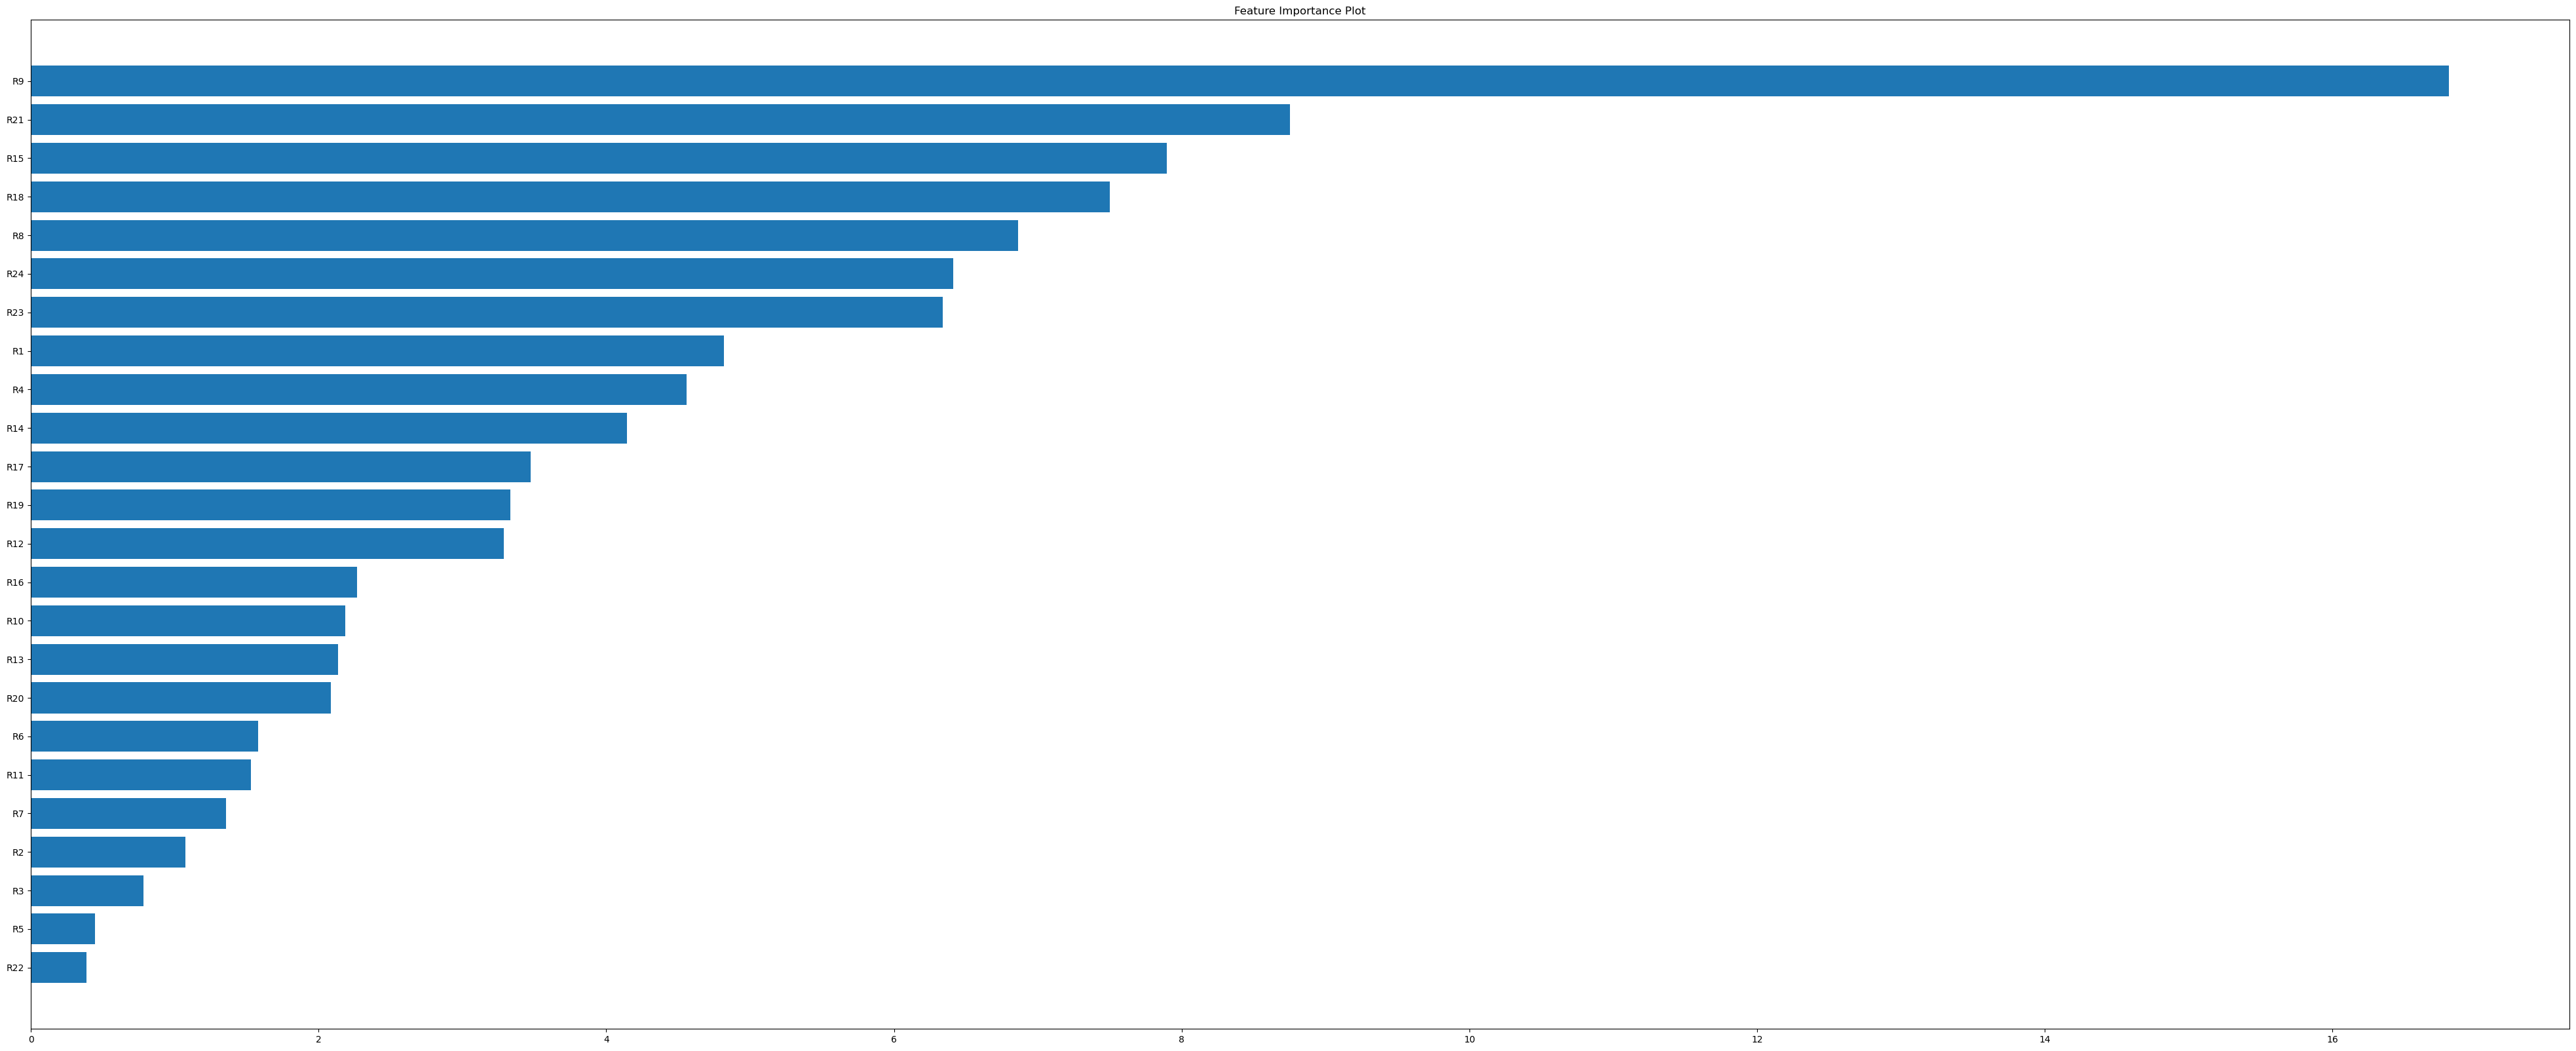

In [190]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from catboost import  CatBoostClassifier


bank = pd.read_csv('Bankruptcy.csv')
X = bank.drop(['NO','D','YR'],axis= 1)
y = bank['D']

cat_gbm = CatBoostClassifier(random_state=2023)
params = {'learning_rate':[0.1,0.15,0.3,0.35,0.4,0.5],
          'n_estimators':[25,50,75],
          'max_depth':[2,3,4,5]}

kfold =  StratifiedKFold(n_splits=5,shuffle=True,random_state=2023)
gcv = GridSearchCV(cat_gbm, param_grid = params,cv = kfold,scoring='roc_auc')
gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)

########################## VIEW TREE ##########################################
best_model = gcv.best_estimator_                                 
imps = best_model.feature_importances_
cols = X.columns
s_index = np.argsort(imps) 
sorted_imps = imps[s_index]   
sorted_x = cols[s_index]
plt.figure(figsize=(50,20))
plt.barh(sorted_x,sorted_imps)
plt.title("Feature Importance Plot") 
plt.show()


# {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
# 0.9184277261200338

In [202]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 6.5 MB/s eta 0:00:00


In [210]:
gbm=LGBMClassifier(random_state=2023)
gbm.fit(x, y)
y_pred_prob = gbm.predict_proba(X)[:,1]
print(roc_auc_score(y, y_pred_prob))


1.0


# H2O

In [212]:
import h2o

In [214]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.16+11-LTS-199, mixed mode)
  Starting server from C:\Users\dbda-lab\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\dbda-lab\AppData\Local\Temp\tmpiels0lym
  JVM stdout: C:\Users\dbda-lab\AppData\Local\Temp\tmpiels0lym\h2o_dbda_lab_started_from_python.out
  JVM stderr: C:\Users\dbda-lab\AppData\Local\Temp\tmpiels0lym\h2o_dbda_lab_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_dbda_lab_db22p0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.979 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [215]:
bank =  h2o.import_file("Bankruptcy.csv",destination_frame='Bank')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [216]:
train,test=bank.split_frame(ratios=[0.7],destination_frames=['train','test'],seed=2023)

In [217]:
print(bank.shape)

(132, 27)


In [218]:
x = bank.col_names[2:]    ## avoid first two columns
y = 'D'

In [219]:
bank['D'] = bank['D'].asfactor()
bank['D'].levels()

[['0', '1']]

In [222]:

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_logistic = H2OGeneralizedLinearEstimator(family = "binomial")
glm_logistic.train(x = x, y = y , training_frame= train, validation_frame= test, model_id= "glm_logistic")
print(glm_logistic.auc(valid=True))
print(glm_logistic.confusion_matrix())



glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
0.9506172839506173
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4765944193533772
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      42   6    0.125    (6.0/48.0)
1      10   38   0.2083   (10.0/48.0)
Total  52   44   0.1667   (16.0/96.0)


In [231]:
# for random forest
from h2o.estimators import H2ORandomForestEstimator
randf = H2ORandomForestEstimator(ntrees=50, max_depth=20)
randf.train(x = x, y = y , training_frame= train, validation_frame= test, model_id= "randf")
print(randf.auc())
print(randf.confusion_matrix())


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


KeyError: 'AUC'

In [229]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
randf = H2OGradientBoostingEstimator(ntrees=50, max_depth=20)
randf.train(x = x, y = y , training_frame= train, validation_frame= test, model_id= "randf")
print('AUC_Score',glm_logistic.auc())
print(glm_logistic.confusion_matrix())


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
AUC_Score 0.8823784722222222
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4765944193533772
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      42   6    0.125    (6.0/48.0)
1      10   38   0.2083   (10.0/48.0)
Total  52   44   0.1667   (16.0/96.0)
